### INTRODUCTION OF THE DATASET 


 
**The dataset**: The goal is to predict `price` of given diamond/gemstone ( Regression Analysis).

**There are 10 independent variables (including `id`)**
* `id` : unique identifier of each diamond
* `carat` : Carat (ct.) refers to the unique unit of weight measurement used exclusively to weigh gemstones and diamonds.
* `cut` : Quality of Diamond Cut
* `color` : Color of Diamond
* `clarity` : Diamond clarity is a measure of the purity and rarity of the stone, graded by the visibility of these characteristics under 10-power magnification.
* `depth` : The depth of diamond is its height (in millimeters) measured from the culet (bottom tip) to the table (flat, top surface)
* `table` : A diamond's table is the facet which can be seen when the stone is viewed face up.
* `x` : Diamond X dimension
* `y` : Diamond Y dimension
* `x` : Diamond Z dimension
  
**Target variable:**
* `price`: Price of the given Diamond.

Dataset Source Link :
[Link of gemstone.csv dataset](https://www.kaggle.com/competitions/playground-series-s3e8/data?select=train.csv)

----------------------------------------------------------------------------------------------------------------------
   

### Step 1: IMPORT THE REQUIRED LIBRARIES AND INGEST THE DATA

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns


import warnings
warnings.filterwarnings("ignore")

In [2]:
data=pd.read_csv(r"C:\\Users\\Admin\Desktop\\ineuron\\_FSDSM_SelfLearned_RashmiKumari\\MACHINE_LEARNING\\01.End_to_End_setup_and_MLproject\\01.Setup_for_ML_DL_projects\\notebooks\\data\\gemstone.csv")

In [3]:
data.head()    # head(): 5 very first elements appeared in the dataset.

,id,carat,cut,color,clarity,depth,table,x,y,z,price
0,0,1.52,Premium,F,VS2,62.2,58.0,7.27,7.33,4.55,13619
1,1,2.03,Very Good,J,SI2,62.0,58.0,8.06,8.12,5.05,13387
2,2,0.70,Ideal,G,VS1,61.2,57.0,5.69,5.73,3.50,2772
3,3,0.32,Ideal,G,VS1,61.6,56.0,4.38,4.41,2.71,666
4,4,1.70,Premium,G,VS2,62.6,59.0,7.65,7.61,4.77,14453


In [4]:
data.tail()    # tail(): 5 very last elements appeared in the dataset.

,id,carat,cut,color,clarity,depth,table,x,y,z,price
193568,193568,0.31,Ideal,D,VVS2,61.1,56.0,4.35,4.39,2.67,1130
193569,193569,0.70,Premium,G,VVS2,60.3,58.0,5.75,5.77,3.47,2874
193570,193570,0.73,Very Good,F,SI1,63.1,57.0,5.72,5.75,3.62,3036
193571,193571,0.34,Very Good,D,SI1,62.9,55.0,4.45,4.49,2.81,681
193572,193572,0.71,Good,E,SI2,60.8,64.0,5.73,5.71,3.48,2258


The loaded data provides information about gemstones, including their carat weight, cut quality, color, clarity, dimensions (x, y, z), and price. Now, let's visualize some distributions from this dataset.

In [5]:
data.columns    # columns: Gives names of the columns.This is an attribute.how we came to know--> no () after columns.

Index(['id', 'carat', 'cut', 'color', 'clarity', 'depth', 'table', 'x', 'y',
       'z', 'price'],
      dtype='object')

In [6]:
data.shape      # shape : This returns the shape of the dataset. (total no. of rows,total no. of columns). 
                #         shape is also attribute and not a method/function.

(193573, 11)

In [7]:
print("Number of rows/records in the dataset:",data.shape[0])
print("Nuber of columns in the dataset:",data.shape[1])

Number of rows/records in the dataset: 193573
Nuber of columns in the dataset: 11


In [8]:
data.sample(20)   #sample(): method provides random sample out of the dataset...
                  #           sample(mention how many records we want in our random sample. ie. size of random sample)

,id,carat,cut,color,clarity,depth,table,x,y,z,price
69116,69116,1.51,Very Good,H,VS2,63.5,57.0,7.25,7.28,4.61,11455
110874,110874,0.31,Ideal,I,VS1,61.2,56.0,4.38,4.41,2.69,709
142881,142881,1.51,Good,H,VS2,63.8,56.0,7.12,7.23,4.60,9498
43802,43802,0.55,Ideal,F,SI1,61.7,55.0,5.28,5.31,3.27,1764
159053,159053,1.82,Premium,G,VS2,62.4,58.0,7.78,7.73,4.85,15147
14696,14696,0.51,Ideal,E,SI1,61.7,56.0,5.18,5.22,3.21,1375
77471,77471,0.50,Good,D,SI1,63.9,55.0,5.03,4.98,3.21,1238
75130,75130,0.56,Ideal,G,VS1,61.2,57.0,5.32,5.35,3.26,2068
172932,172932,1.53,Ideal,G,SI2,61.7,54.0,7.38,7.43,4.57,9069
28750,28750,0.50,Ideal,D,SI1,62.4,57.0,5.10,5.08,3.18,1684


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193573 entries, 0 to 193572
Data columns (total 11 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       193573 non-null  int64  
 1   carat    193573 non-null  float64
 2   cut      193573 non-null  object 
 3   color    193573 non-null  object 
 4   clarity  193573 non-null  object 
 5   depth    193573 non-null  float64
 6   table    193573 non-null  float64
 7   x        193573 non-null  float64
 8   y        193573 non-null  float64
 9   z        193573 non-null  float64
 10  price    193573 non-null  int64  
dtypes: float64(6), int64(2), object(3)
memory usage: 16.2+ MB


**Check for the null values.**

In [10]:
# data.isnull()   : This gives Boolean values in Dataframe form.

print("Number of Null/missing values in the dataset: ")

data.isnull().sum()   # Conclusion: No null value is there in any column.

Number of Null/missing values in the dataset: 


id         0
carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          0
y          0
z          0
price      0
dtype: int64

**Check for the duplicate values**

In [11]:
# data.duplicated() : This gives Boolean values 
data.duplicated().sum()  # This gives the number of records which are duplicate.

0

In [12]:
data[data.duplicated()=="True"]   # If  we have some finite number of duplicate values and
                                  # we want to check what are they?Then we can use this code.

                                  #Conclusion : No duplicate record is there.

,id,carat,cut,color,clarity,depth,table,x,y,z,price


**Check the statistical summary  of data**

In [13]:
data.describe().T     # Best part of describe() is , it automatically considers only numerical values.
                      # T : T is Transpose ,to transpose the result

,count,mean,std,min,25%,50%,75%,max
id,193573.0,96786.000000,55879.856166,0.0,48393.00,96786.00,145179.00,193572.00
carat,193573.0,0.790688,0.462688,0.2,0.40,0.70,1.03,3.50
depth,193573.0,61.820574,1.081704,52.1,61.30,61.90,62.40,71.60
table,193573.0,57.227675,1.918844,49.0,56.00,57.00,58.00,79.00
x,193573.0,5.715312,1.109422,0.0,4.70,5.70,6.51,9.65
y,193573.0,5.720094,1.102333,0.0,4.71,5.72,6.51,10.01
z,193573.0,3.534246,0.688922,0.0,2.90,3.53,4.03,31.30
price,193573.0,3969.155414,4034.374138,326.0,951.00,2401.00,5408.00,18818.00


**conclusion from describe() : Gives statistical summary**

1. *Diamond Count:*
   - Dataset comprises 193,573 diamonds with unique IDs ranging from 0 to 193,572.

2. *Carat Weight (Carat):*
   - Average carat weight is 0.79.
   - Ranges from 0.2 to 3.5.
   - 25% of diamonds have carat weight below 0.4, 50% below 0.70 and 75% below 1.03.
   - Standard Deviation is 0.46

3. *Depth (percentage) :*
   - Range from 52.1 to 71.60
   - Average depth percentage is 61.82 
   - Standard deviation of 1.08 


4. *Table (percentage) :*
   - Range from 49.0 to 79.00
   - Average table percentage is 57.23  
   - Standard deviation of 1.92

5. *Dimensions (x, y, z) (millimeters ie. mm):*
   - Range of
         x : 0 to 9.65 
         y : 0 to 10.01
         z : 0 to 31.30
   - Average dimensions are approximately 5.72 x 5.72 x 3.53.
   - Standard deviations: 1.11 (x), 1.10 (y), 0.69 (z).

6. *Price:*
   - Prices Range from 326 to 18,818.
   - Average price is 3,969.16.
   - Standard Deviation is 4034.37
   - Right-skewed distribution; median price (50%) is 2,401, while the mean is higher at 3,969.16.
   
------------------------------------------------------------------------------------


**Note:**
* Carats= Milligrams/200   (Since 200mg = 1 carat)
​

* The unit for both "Depth" and "Table" in this dataset is percentage (%). 
These percentages indicate the proportional measurements of the gemstone's depth and table width relative to their average diameters.

        Depth or Depth percentage :It is calculated as (depth / average diameter) * 100
        Table or Table percentage :It is calculated as (table width / average diameter) * 100
   
   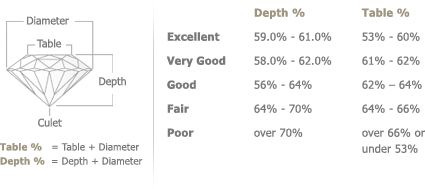

* Standard deviation: The standard deviation for each of these features would have the same unit as the respective feature. 

*  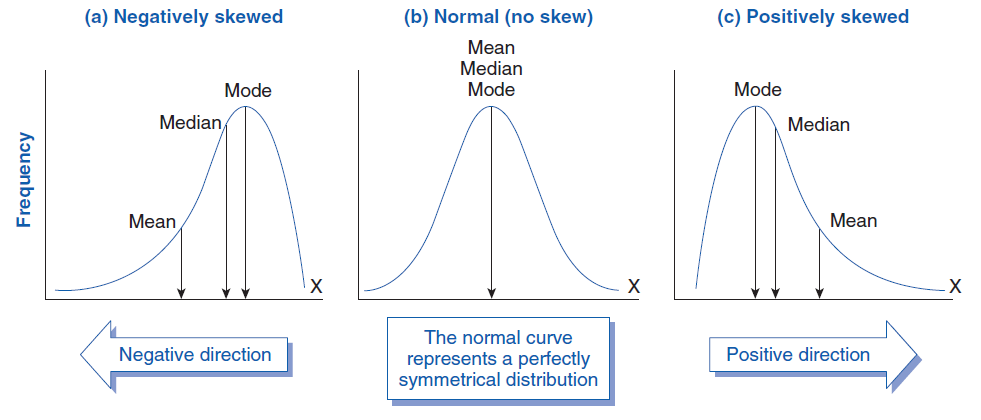

   mean < median => left-skewed distribution (Negatively-skewed) => tail on the left side is longer

   mean > median => right-skewed distribution (Positively-skewed) => tail on the right side is longer 

------------------------------------------------------------------------------


### Step 2: FEATURE ENGINEERNING

**'Id' feature is something that we don't need for analysis,So better to drop it.**

In [14]:
data.drop("id",axis=1,inplace=True)   #inplace= True :  modify the original DataFrame by dropping the mentioned feature permanently

*These all will perform the same task ie. dropping 'id' feature permanently from dataset.*

        data.drop(labels=['id'],axis=1,inplace=True)
        data.drop(columns=['id'],axis=1,inplace=True)
        data.drop("id",axis=1,inplace=True) 
        data= data.drop("id",axis=1) 

        Note: axis=0 means row and axis=1 means column in drop()

In [15]:
data.head(2)   #We can observe that 'id' column is gone.

,carat,cut,color,clarity,depth,table,x,y,z,price
0,1.52,Premium,F,VS2,62.2,58.0,7.27,7.33,4.55,13619
1,2.03,Very Good,J,SI2,62.0,58.0,8.06,8.12,5.05,13387



**Sorting the Numercial and Categorical Values**

In [16]:
data.info()  # From this we came to know about datatypes of features .
             # dtype : float,object,int : so float and int => numerical => float and int are non-object.
             # Therefore we can seprate the data as object--> Categorical and non-object---> Numerical

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193573 entries, 0 to 193572
Data columns (total 10 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   carat    193573 non-null  float64
 1   cut      193573 non-null  object 
 2   color    193573 non-null  object 
 3   clarity  193573 non-null  object 
 4   depth    193573 non-null  float64
 5   table    193573 non-null  float64
 6   x        193573 non-null  float64
 7   y        193573 non-null  float64
 8   z        193573 non-null  float64
 9   price    193573 non-null  int64  
dtypes: float64(6), int64(1), object(3)
memory usage: 14.8+ MB


In [17]:
# Method I: (Suggested as it is short)

categorical_col=data.columns[data.dtypes=="object"]
numerical_col=data.columns[data.dtypes!="object"]

print("Numerical_columns:",list(numerical_col))
print("Categorical_feature:",list(categorical_col))

Numerical_columns: ['carat', 'depth', 'table', 'x', 'y', 'z', 'price']
Categorical_feature: ['cut', 'color', 'clarity']


In [18]:
# Method II: Using loop and if-else: (Not Suggested as it is lengthy...Good to understand the logic!!!)

features=list(data.columns)    #Typecasting to get a List structure.

numerical_feature=[]
categorical_feature=[]

for f in features:

    if data[f].dtype=='object':
        categorical_feature.append(f)
    else:
        numerical_feature.append(f)


print("Numerical_columns:",numerical_feature)
print("Categorical_feature:",categorical_feature)

Numerical_columns: ['carat', 'depth', 'table', 'x', 'y', 'z', 'price']
Categorical_feature: ['cut', 'color', 'clarity']


In [19]:
# Analysing the Categorical features : ['cut', 'color', 'clarity']

categorical_feature

['cut', 'color', 'clarity']

In [20]:
data[categorical_col]

,cut,color,clarity
0,Premium,F,VS2
1,Very Good,J,SI2
2,Ideal,G,VS1
3,Ideal,G,VS1
4,Premium,G,VS2
...,...,...,...
193568,Ideal,D,VVS2
193569,Premium,G,VVS2
193570,Very Good,F,SI1
193571,Very Good,D,SI1


In [21]:
data[categorical_col].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193573 entries, 0 to 193572
Data columns (total 3 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   cut      193573 non-null  object
 1   color    193573 non-null  object
 2   clarity  193573 non-null  object
dtypes: object(3)
memory usage: 4.4+ MB


In [22]:
data[categorical_col].isnull().sum()

cut        0
color      0
clarity    0
dtype: int64

In [23]:
data[categorical_col].describe()   # Statistical Summary

,cut,color,clarity
count,193573,193573,193573
unique,5,7,8
top,Ideal,G,SI1
freq,92454,44391,53272


In [24]:
# Unique values presnet inside each of the categorical features:
print("There are",data[categorical_col]['cut'].nunique(),"values present in 'cut' feature :",data[categorical_col]['cut'].unique())
print("There are",data[categorical_col]['color'].nunique(),"values present in 'color' feature :",data[categorical_col]['color'].unique())
print("There are",data[categorical_col]['clarity'].nunique(),"values present in 'clarity' feature :",data[categorical_col]['clarity'].unique())

There are 5 values present in 'cut' feature : ['Premium' 'Very Good' 'Ideal' 'Good' 'Fair']
There are 7 values present in 'color' feature : ['F' 'J' 'G' 'E' 'D' 'H' 'I']
There are 8 values present in 'clarity' feature : ['VS2' 'SI2' 'VS1' 'SI1' 'IF' 'VVS2' 'VVS1' 'I1']


In [25]:
# Sicne cut,color and clarity are non numerical , so we cannot find mean or median...But we can find mode.

print("Mode in cut feature:",data[categorical_col]['cut'].mode().values)
print("Mode in color feature:",data[categorical_col]['color'].mode().values)
print("Mode in clarity feature:",data[categorical_col]['clarity'].mode().values)


Mode in cut feature: ['Ideal']
Mode in color feature: ['G']
Mode in clarity feature: ['SI1']


-------------------------------------------------------------------------

# INDEX OF EXPLORATORY DATA ANALYSIS :
A.Categorical Features: cut,clarity and color
(a) Univariate Analysis : Distribution of Diamond Cut, Color, and Clarity

`(a.1)`

- Individual countplots for cut,color and clarity
- Using Subplot with sns : Combined counplots of these 3 features using seaborn with subplots.
- Using Subplot with plotly : Combined counplots of these 3 features using plotly with subplots.

`(a.2)`

- Individual donut charts for cut,color and clarity in percentage form
- Using Subplot with sns : Combined Donut charts of these 3 features using seaborn with subplots.
- Using Subplot with plotly : Combined Donut charts of these 3 features using plotly with subplots.


`(a.3)`

- Distribution of Diamond Cut, Color, and Clarity Using sns and plotly ( combination of a.1 and a.2 Distributions)

(b) Bivariate Analysis : Count of Diamonds by (Cut and Color) , (Cut and Clarity) , (Color and Clarity)

`(b.1)`
- Count of Diamonds by (Cut and Color)
- Count of Diamonds by (Cut and Clarity)
- Count of Diamonds by (Color and Clarity)


**Observation: cut,clarity and color all three are Ordinal Catergorical Variables.**

------------------------------------------------------------------------------------------------------------------------------------

## 01. UNIVARIATE ANALYSIS

In [26]:
# Lets observe the unique values and its respective value_counts present inside each cateforical feature:
data[categorical_col]['cut'].value_counts()

Ideal        92454
Premium      49910
Very Good    37566
Good         11622
Fair          2021
Name: cut, dtype: int64

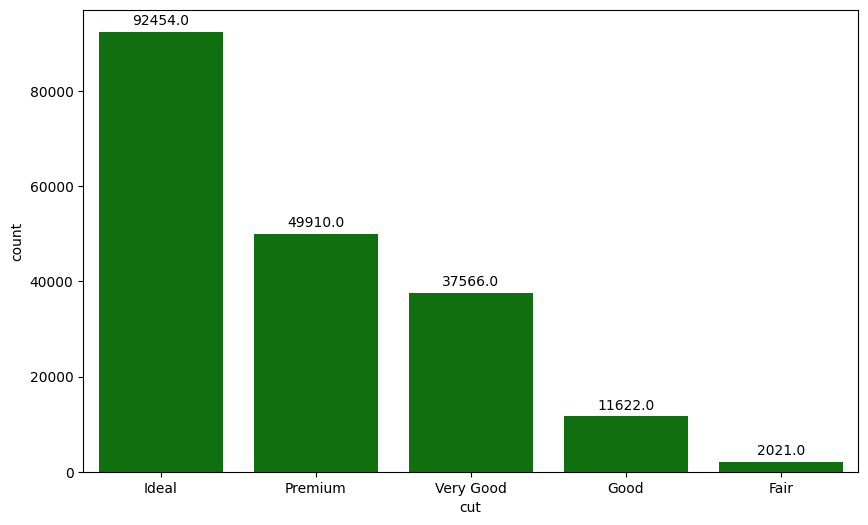

In [27]:
plt.figure(figsize=(10,6))    # Sets the figure size

ax1=sns.countplot(x='cut',data=data[categorical_col],order=["Ideal","Premium","Very Good","Good","Fair"],color='green')

for p in ax1.patches:     #This loop is for denoting the values over each bar.... patches is a keyword here ...
    ax1.annotate(f'{p.get_height()}',(p.get_x() + p.get_width() / 2., p.get_height()),ha='center', va='center', xytext=(0,8), textcoords='offset points')

In [28]:
data[categorical_col]['color'].value_counts()

G    44391
E    35869
F    34258
H    30799
D    24286
I    17514
J     6456
Name: color, dtype: int64

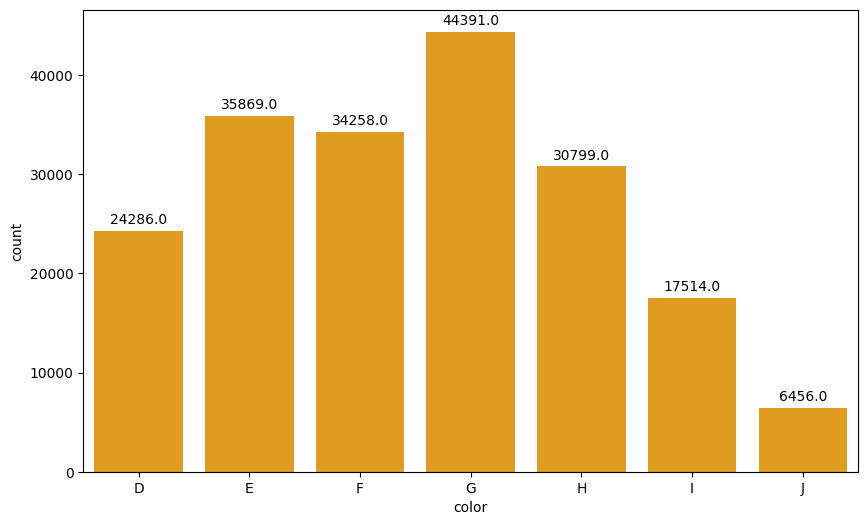

In [29]:
plt.figure(figsize=(10,6))    # Sets the figure size

ax2=sns.countplot(x='color',data=data[categorical_col],order=["D","E","F","G","H","I","J"],color='Orange')

for p in ax2.patches:     #This loop is for denoting the values over each bar.... patches is a keyword here ...
    ax2.annotate(f'{p.get_height()}',(p.get_x() + p.get_width() / 2., p.get_height()),ha='center', va='center', xytext=(0,8), textcoords='offset points')

In [30]:
data[categorical_col]['clarity'].value_counts()

SI1     53272
VS2     48027
VS1     30669
SI2     30484
VVS2    15762
VVS1    10628
IF       4219
I1        512
Name: clarity, dtype: int64

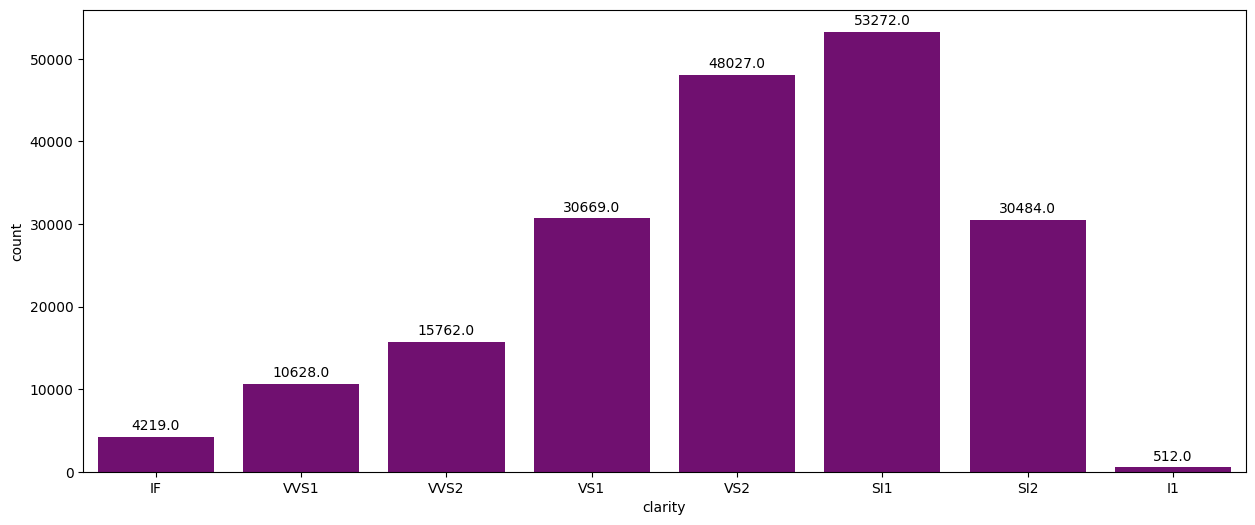

In [31]:
plt.figure(figsize=(15,6))    # Sets the figure size

ax3=sns.countplot(x='clarity',data=data[categorical_col],order=['IF','VVS1','VVS2','VS1','VS2','SI1','SI2','I1'],color='Purple')   #This plots the bars 

for p in ax3.patches:     #This loop is for denoting the values over each bar.... patches is a keyword here ...
    ax3.annotate(f'{p.get_height()}',(p.get_x() + p.get_width() / 2., p.get_height()),ha='center', va='center', xytext=(0,8), textcoords='offset points')

# textcoords='offset points' : Places over each bar...
# xytext=(0,8): Sshows how above the value will be places over each bar...(making some distance)
# ha and va : means horizontal and vertical alignment.
# p.get_x() + p.get_width() / 2., p.get_height()) : This is basically a formula used to get the middle alinment place for annotaion of the count_value.


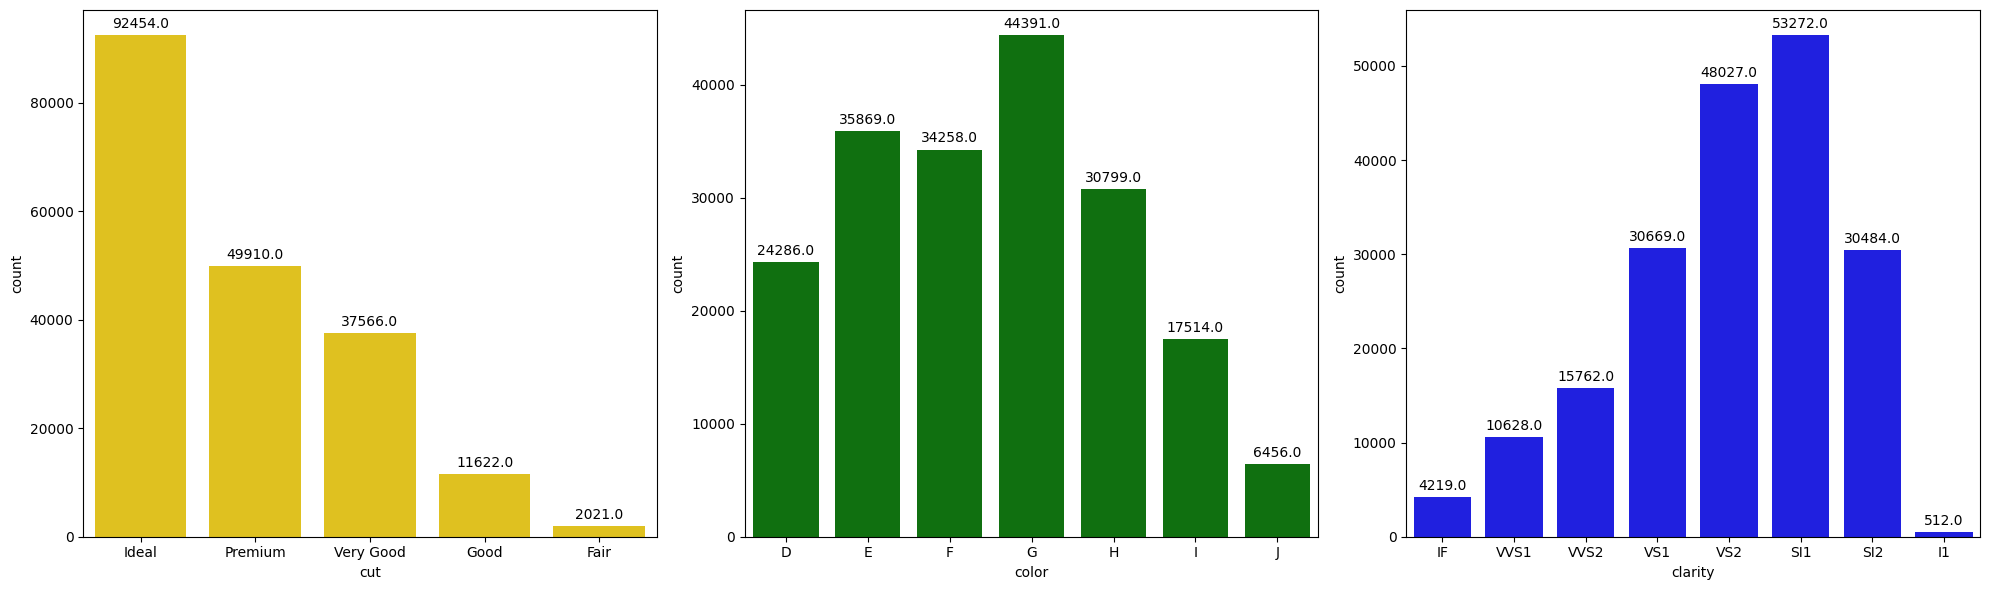

In [32]:
# Observation Summary Using seaborn with subplot and using plotly with subplot

plt.rcParams['figure.figsize'] = (20, 6)

# Create subplots with 1 row and 3 columns
fig, axes = plt.subplots(1, 3)

# Set custom colors
colors = ['gold', 'green', 'blue']

# Countplot for 'cut'
ax1 = sns.countplot(x='cut', data=data[categorical_col], order=["Ideal", "Premium", "Very Good", "Good", "Fair"], color=colors[0], ax=axes[0])
for p in ax1.patches:
    ax1.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 8), textcoords='offset points')

# Countplot for 'color'
ax2 = sns.countplot(x='color', data=data[categorical_col], order=["D", "E", "F", "G", "H", "I", "J"], color=colors[1], ax=axes[1])
for p in ax2.patches:
    ax2.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 8), textcoords='offset points')

# Countplot for 'clarity'
ax3 = sns.countplot(x='clarity', data=data[categorical_col], order=['IF', 'VVS1', 'VVS2', 'VS1', 'VS2', 'SI1', 'SI2', 'I1'], color=colors[2], ax=axes[2])
for p in ax3.patches:
    ax3.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 8), textcoords='offset points')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


In [33]:
# Doing the same using Plotly

import plotly.graph_objects as go
import plotly.express as px

# Create subplots with 1 row and 3 columns
fig = go.Figure()

# Custom colors
colors = ['gold', 'green', 'blue']

# Countplot for 'cut'
fig.add_trace(go.Bar(
    x=data[categorical_col]['cut'].value_counts().index,
    y=data[categorical_col]['cut'].value_counts().values,
    marker_color=colors[0],
    text=data[categorical_col]['cut'].value_counts().values,
    textposition='auto',
    name='Cut',
))

# Countplot for 'color'
fig.add_trace(go.Bar(
    x=data[categorical_col]['color'].value_counts().index,
    y=data[categorical_col]['color'].value_counts().values,
    marker_color=colors[1],
    text=data[categorical_col]['color'].value_counts().values,
    textposition='auto',
    name='Color',
))

# Countplot for 'clarity'
fig.add_trace(go.Bar(
    x=data[categorical_col]['clarity'].value_counts().index,
    y=data[categorical_col]['clarity'].value_counts().values,
    marker_color=colors[2],
    text=data[categorical_col]['clarity'].value_counts().values,
    textposition='auto',
    name='Clarity',
))

# Update layout
fig.update_layout(
    barmode='stack',
    bargap=0.15,
    title='Distribution of Cut, Color, and Clarity of Diamonds in Descending Order',
    showlegend=True,
)

# Show the plot
fig.show()


----------------------------------------------------------------------------------------------------------------
Lets Observe things in Percentage form:

The value_counts(Normalize=True)*100 is used to see the percentage distribution of each unique items.

In [34]:
# Using this value_count we can get the idea of percentage of each charateristics in each categorical feature:
data[categorical_col]['cut'].value_counts(normalize=True)*100

Ideal        47.761826
Premium      25.783555
Very Good    19.406632
Good          6.003936
Fair          1.044051
Name: cut, dtype: float64

In [35]:
# Lets round it upto 2 decimal points and convert into dataframe

cut_distribution_percentage=pd.DataFrame(round(data[categorical_col]['cut'].value_counts(normalize=True)*100,2))
color_distribution_percentage=pd.DataFrame(round(data[categorical_col]['color'].value_counts(normalize=True)*100,2))
clarity_distribution_percentage=pd.DataFrame(round(data[categorical_col]['clarity'].value_counts(normalize=True)*100,2))

In [36]:
print("Distirbution of charateristics of Cut Feature in Percentage :")
cut_distribution_percentage

Distirbution of charateristics of Cut Feature in Percentage :


,cut
Ideal,47.76
Premium,25.78
Very Good,19.41
Good,6.00
Fair,1.04


In [37]:
print("Distirbution of charateristics of Color Feature in Percentage :")
color_distribution_percentage

Distirbution of charateristics of Color Feature in Percentage :


,color
G,22.93
E,18.53
F,17.70
H,15.91
D,12.55
I,9.05
J,3.34


In [38]:
print("Distirbution of charateristics of Clarity Feature in Percentage :")
clarity_distribution_percentage

Distirbution of charateristics of Clarity Feature in Percentage :


,clarity
SI1,27.52
VS2,24.81
VS1,15.84
SI2,15.75
VVS2,8.14
VVS1,5.49
IF,2.18
I1,0.26



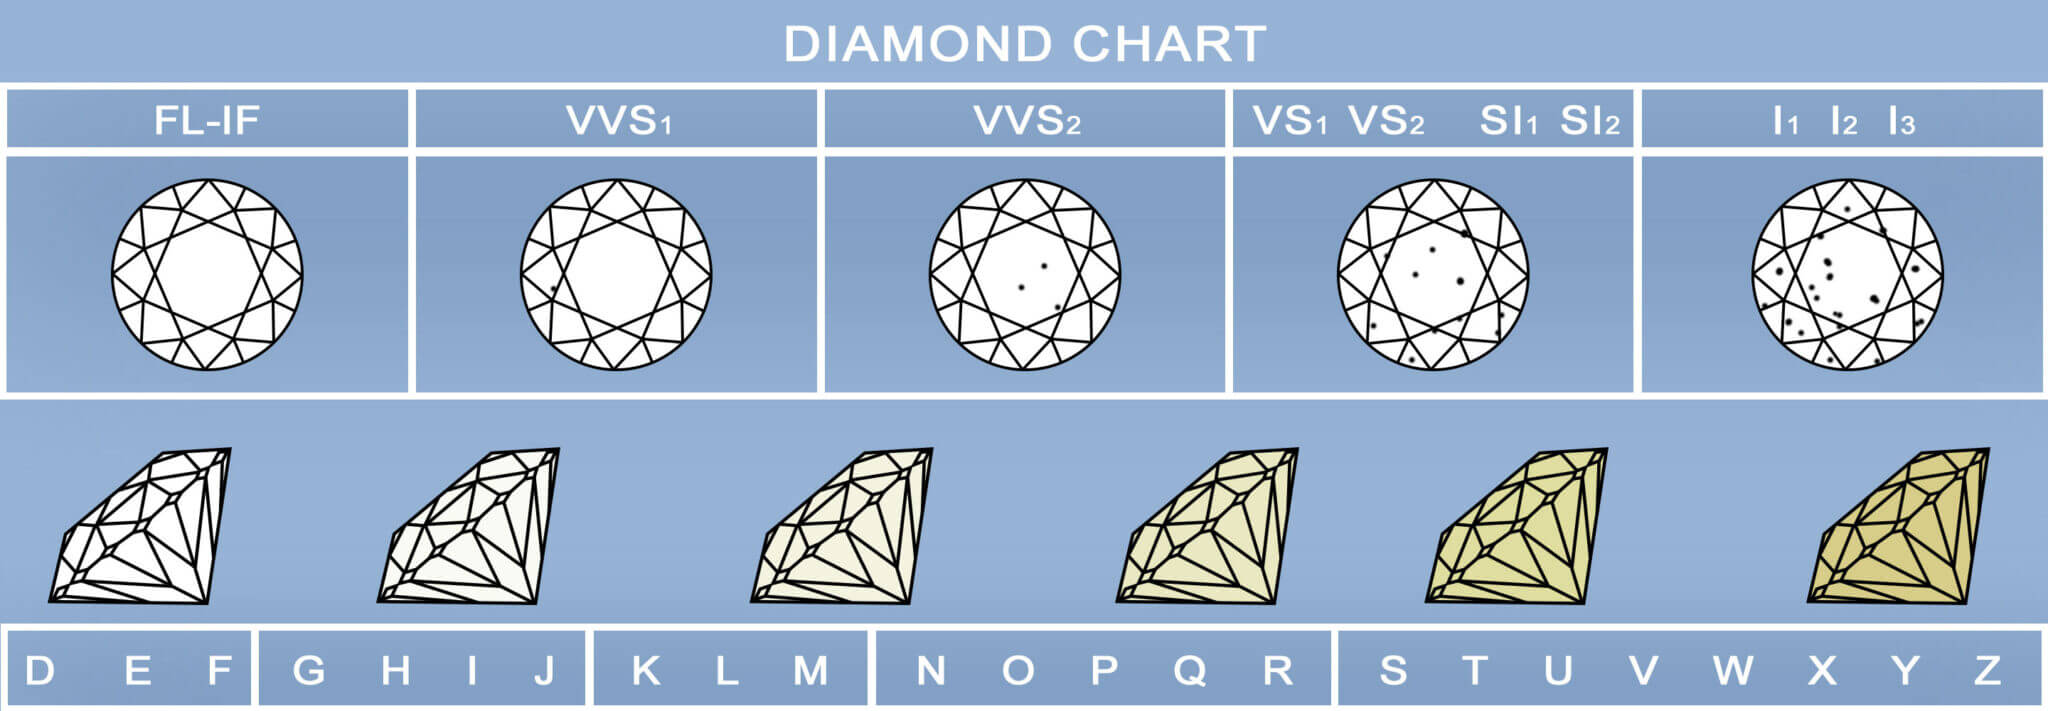

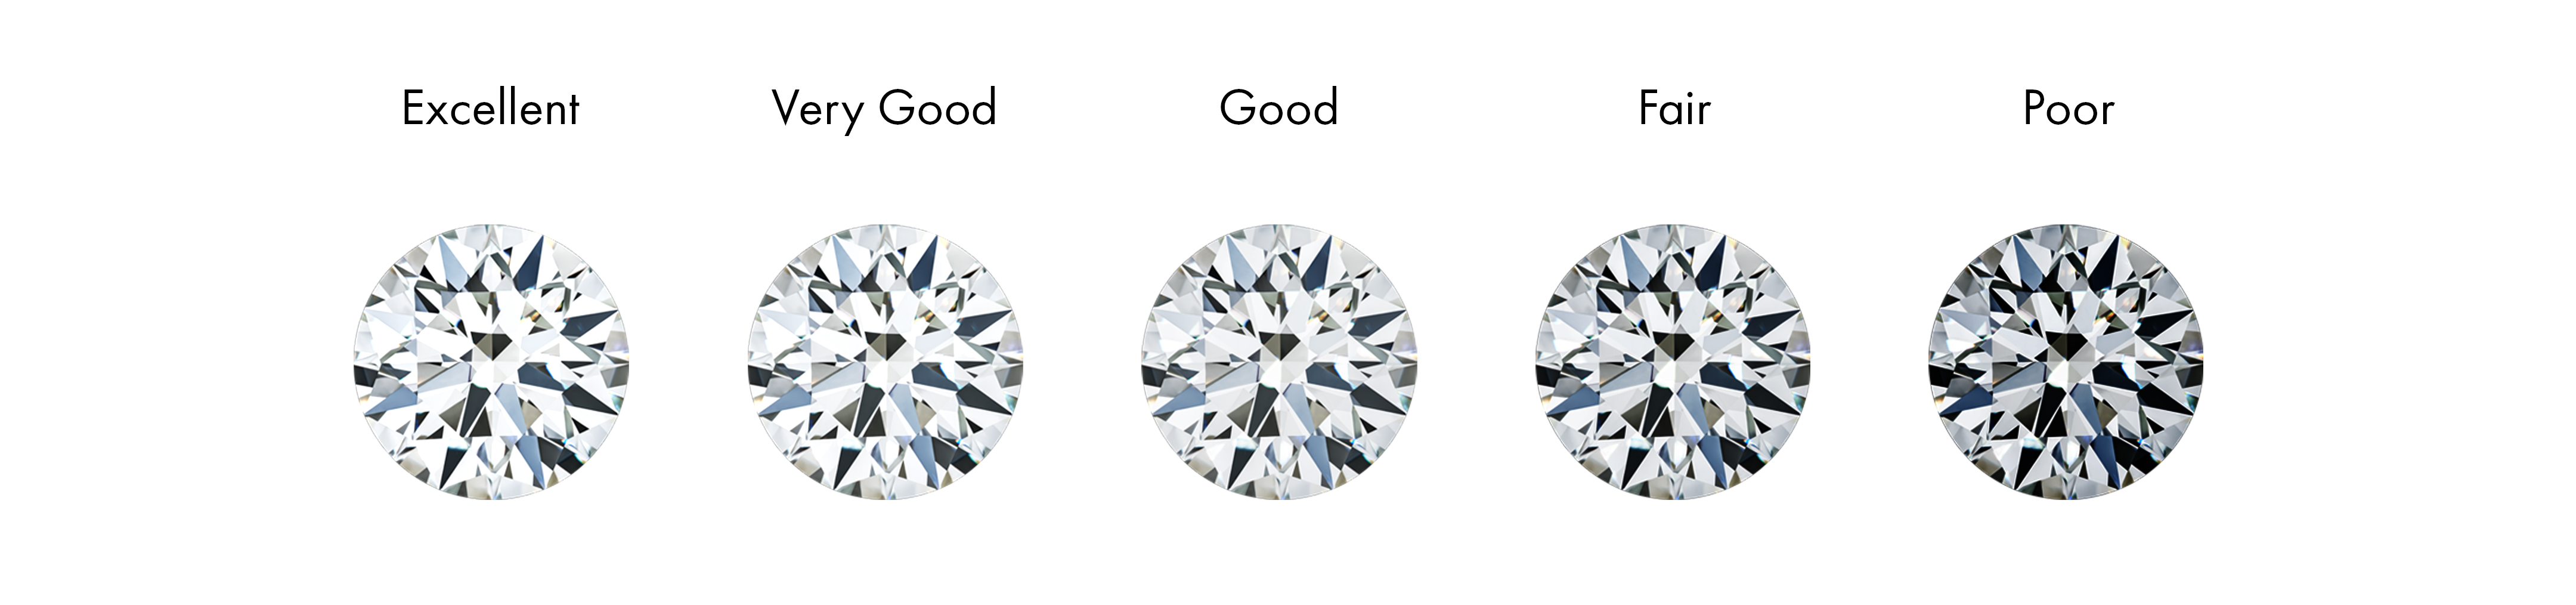


In [39]:
# Cutomize order: Top to Bottom Quality Ranking

order1 = ["Ideal", "Premium", "Very Good", "Good", "Fair"]
print("Cutting Ranking of Diamond from High to Low quality!!!")
cut_sorted_df=pd.DataFrame(cut_distribution_percentage,index=order1)
cut_sorted_df


Cutting Ranking of Diamond from High to Low quality!!!


,cut
Ideal,47.76
Premium,25.78
Very Good,19.41
Good,6.00
Fair,1.04


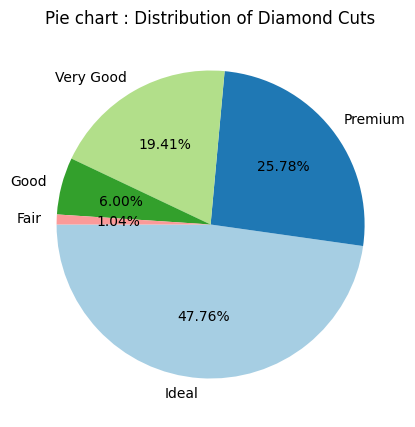

In [40]:
plt.figure(figsize=(10,5))
sns.set_palette("Paired") 

plt.pie(cut_sorted_df['cut'], labels=cut_sorted_df.index, autopct='%0.2f%%',startangle=180)

plt.title('Pie chart : Distribution of Diamond Cuts')
plt.show()

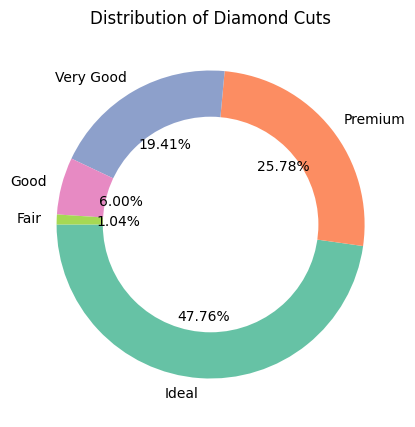

In [41]:
plt.figure(figsize=(12,5))
sns.set_palette("Set2") 

plt.pie(cut_sorted_df['cut'], labels=cut_sorted_df.index, autopct='%0.2f%%',startangle=180)


# Draw donut ==> using creating a circle inside.
centre_circle = plt.Circle((0, 0),0.7,fc='white')   #  choose centre where we want inner circle's center , 0.6 --> 60% of main circle raduis, fc='white'-->color of inner circle
fig = plt.gcf()   #gcf():get current figure
fig.gca().add_artist(centre_circle)

# Set plot title and show the plot
plt.title('Distribution of Diamond Cuts')
plt.show()


In [42]:
order2=['D','E','F','G','H','I','J']
print("Color Ranking  of Diamond from High to Low quality!!!")
color_sorted_df=pd.DataFrame(color_distribution_percentage,index=order2)
color_sorted_df


Color Ranking  of Diamond from High to Low quality!!!


,color
D,12.55
E,18.53
F,17.70
G,22.93
H,15.91
I,9.05
J,3.34


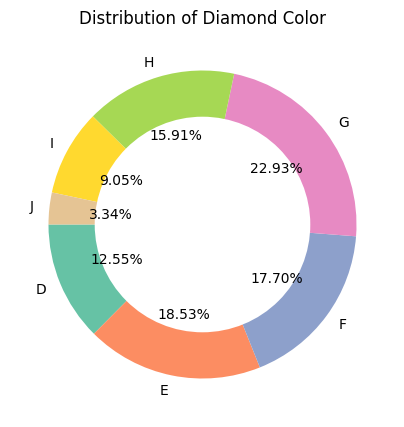

In [43]:
plt.figure(figsize=(12,5))
sns.set_palette("Set2") 

plt.pie(color_sorted_df['color'], labels=color_sorted_df.index, autopct='%0.2f%%',startangle=180)
centre_circle = plt.Circle((0, 0),0.7,fc='white')  
fig = plt.gcf()   
fig.gca().add_artist(centre_circle)

# Set plot title and show the plot
plt.title('Distribution of Diamond Color')
plt.show()

In [44]:
order3=['IF','VVS1','VVS2','VS1','VS2','SI1','SI2','I1']
print("Clarity Ranking of Diamond from High to Low quality!!!")
clarity_sorted_df=pd.DataFrame(clarity_distribution_percentage,index=order3)
clarity_sorted_df


Clarity Ranking of Diamond from High to Low quality!!!


,clarity
IF,2.18
VVS1,5.49
VVS2,8.14
VS1,15.84
VS2,24.81
SI1,27.52
SI2,15.75
I1,0.26


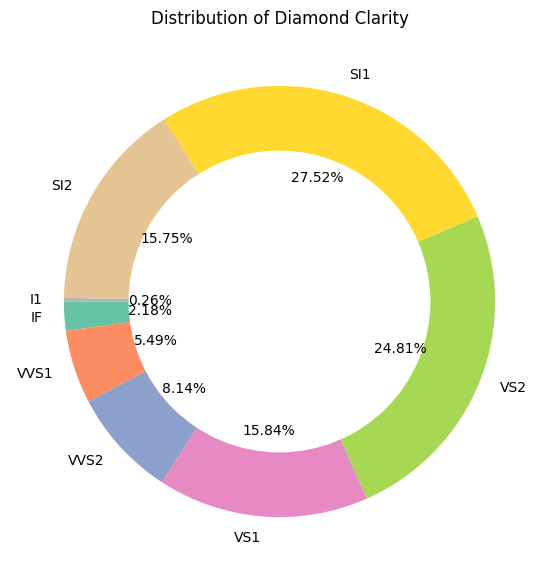

In [45]:
plt.figure(figsize=(12,7))
sns.set_palette("Set2") 

plt.pie(clarity_sorted_df['clarity'], labels=clarity_sorted_df.index, autopct='%0.2f%%',startangle=180)
centre_circle = plt.Circle((0, 0),0.7,fc='white')  
fig = plt.gcf()   
fig.gca().add_artist(centre_circle)

# Set plot title and show the plot
plt.title('Distribution of Diamond Clarity')
plt.show()

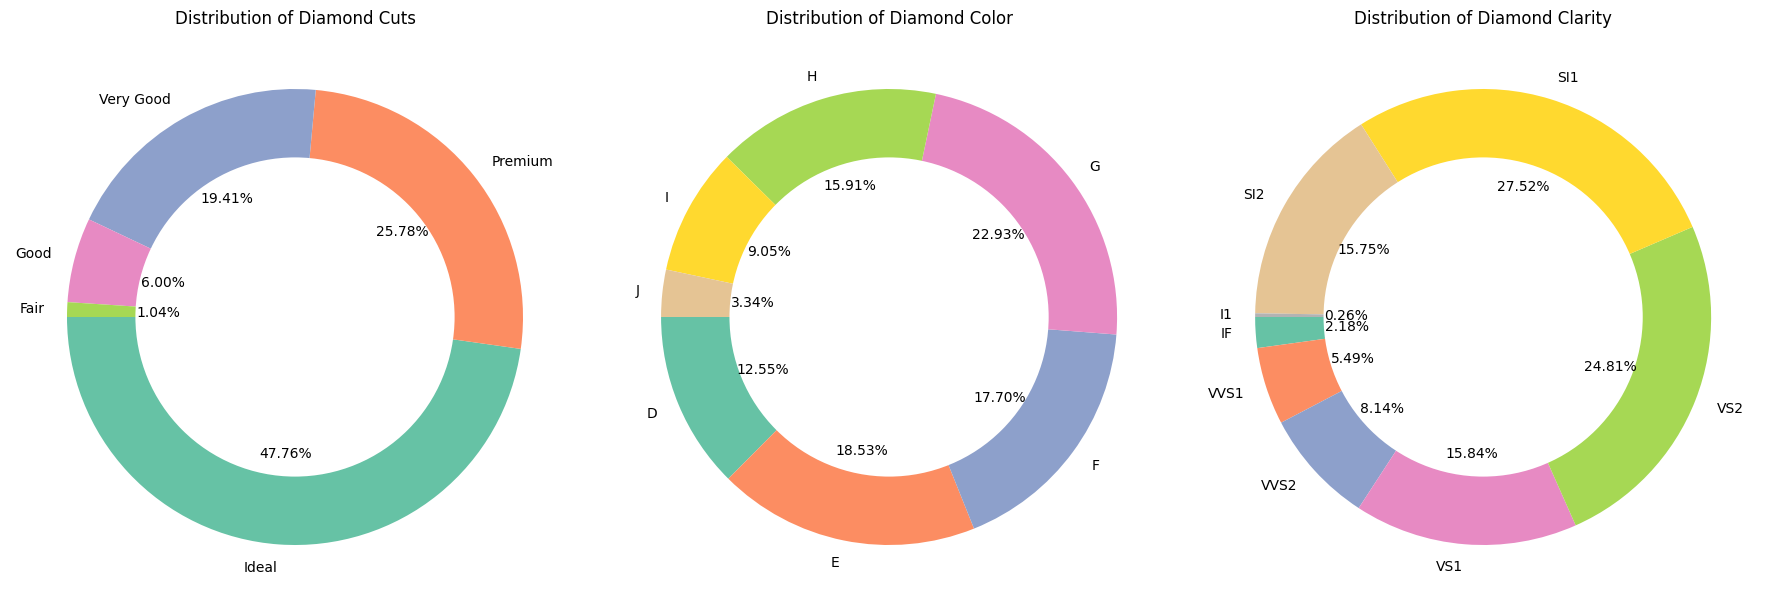

In [46]:
# Observation Summary:

# Set the figure size
plt.figure(figsize=(18, 6))

# Set the color palette
sns.set_palette("Set2")

# Create subplots with 1 row and 3 columns
plt.subplot(1, 3, 1)

# Plot for 'cut'
plt.pie(cut_sorted_df['cut'], labels=cut_sorted_df.index, autopct='%0.2f%%', startangle=180)
centre_circle = plt.Circle((0, 0), 0.7, fc='white')  
fig = plt.gcf()   
fig.gca().add_artist(centre_circle)
plt.title('Distribution of Diamond Cuts')

plt.subplot(1, 3, 2)

# Plot for 'color'
plt.pie(color_sorted_df['color'], labels=color_sorted_df.index, autopct='%0.2f%%', startangle=180)
centre_circle = plt.Circle((0, 0), 0.7, fc='white')  
fig = plt.gcf()   
fig.gca().add_artist(centre_circle)
plt.title('Distribution of Diamond Color')

plt.subplot(1, 3, 3)

# Plot for 'clarity'
plt.pie(clarity_sorted_df['clarity'], labels=clarity_sorted_df.index, autopct='%0.2f%%', startangle=180)
centre_circle = plt.Circle((0, 0), 0.7, fc='white')  
fig = plt.gcf()   
fig.gca().add_artist(centre_circle)
plt.title('Distribution of Diamond Clarity')

# Adjust layout and show the plot
plt.tight_layout()
plt.show()


In [47]:
# The Same as above but using Plotly......

import plotly.graph_objects as go

# Data preparation (replace with your actual data)
cut_labels = cut_sorted_df.index
cut_values = cut_sorted_df['cut']

color_labels = color_sorted_df.index
color_values = color_sorted_df['color']

clarity_labels = clarity_sorted_df.index
clarity_values = clarity_sorted_df['clarity']

# Create subplots with 1 row and 3 columns
fig = go.Figure()

# Plot for 'cut'
fig.add_trace(go.Pie(
    labels=cut_labels,
    values=cut_values,
    hole=0.4,
    marker=dict(colors=px.colors.qualitative.Set2),
    textinfo='percent+label',
    insidetextorientation='radial',
    domain=dict(x=[0, 0.33])
))

# Plot for 'color'
fig.add_trace(go.Pie(
    labels=color_labels,
    values=color_values,
    hole=0.4,
    marker=dict(colors=px.colors.qualitative.Set2),
    textinfo='percent+label',
    insidetextorientation='radial',
    domain=dict(x=[0.33, 0.66])
))

# Plot for 'clarity'
fig.add_trace(go.Pie(
    labels=clarity_labels,
    values=clarity_values,
    hole=0.4,
    marker=dict(colors=px.colors.qualitative.Set2),
    textinfo='percent+label',
    insidetextorientation='radial',
    domain=dict(x=[0.66, 1])
))

# Update layout
fig.update_layout(
    title='Distribution of Diamond Cut, Color, and Clarity',
    showlegend=False,
)

# Show the plot
fig.show()


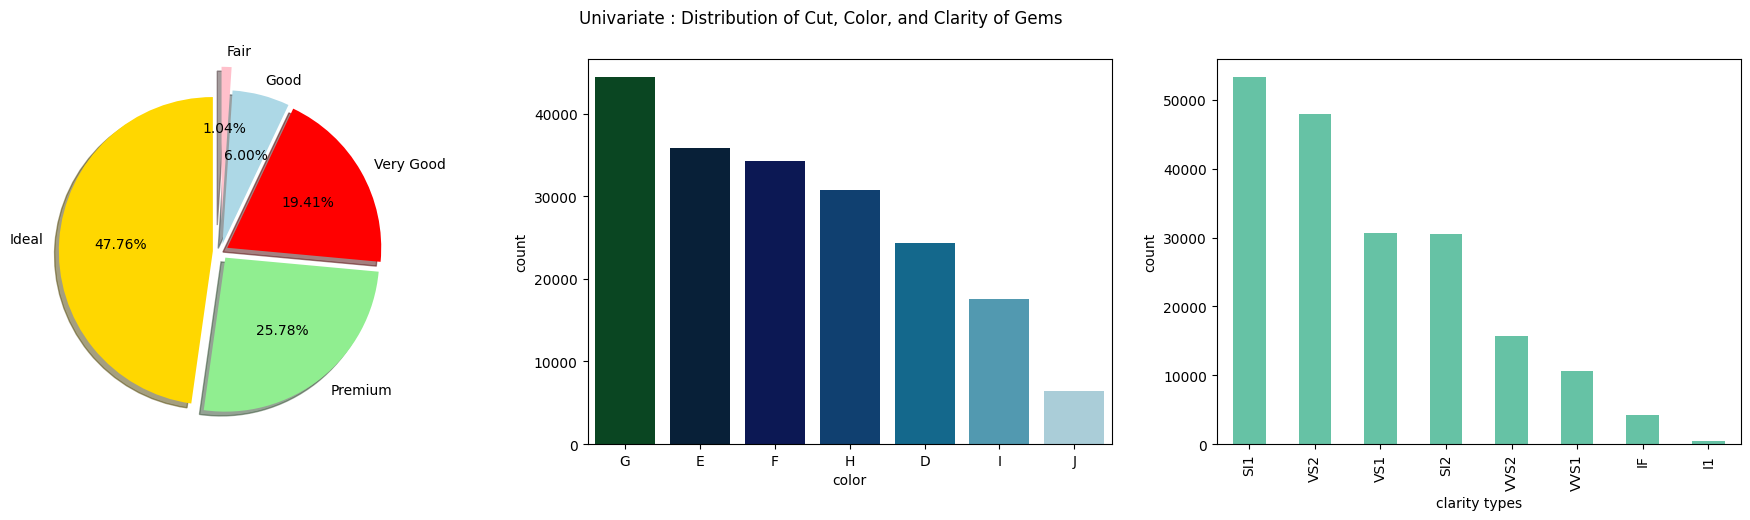

In [48]:
# In Short In one frame:


plt.rcParams['figure.figsize'] = (23, 5)

fig, axes = plt.subplots(1, 3)

# Pie chart
axes[0].pie(data[categorical_col]['cut'].value_counts().values,
            labels=data[categorical_col]['cut'].value_counts().index,
            startangle=90,
            colors=['gold', 'lightgreen', 'red', 'lightblue', 'pink'],
            explode=[0.05, 0.05, 0.05, 0.05, 0.2],
            shadow=True, autopct='%1.2f%%')

# Countplot
sns.countplot(x=data[categorical_col]['color'], palette='ocean', order=data[categorical_col]['color'].value_counts().index, ax=axes[1])

# Bar chart
data[categorical_col]["clarity"].value_counts().plot.bar(ax=axes[2])
axes[2].set_xlabel('clarity types')
axes[2].set_ylabel('count')

plt.suptitle('Univariate : Distribution of Cut, Color, and Clarity of Gems')
plt.show()



In [49]:
# The same as above but using Plotly.

import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.express as px



# Sample data
values1 = data[categorical_col]['cut'].value_counts().values
labels1 = data[categorical_col]['cut'].value_counts().index

values2 = data[categorical_col]['color'].value_counts().values
labels2 = data[categorical_col]['color'].value_counts().index

values3 = data[categorical_col]['clarity'].value_counts().values
labels3 = data[categorical_col]['clarity'].value_counts().index

# Create subplots
fig = make_subplots(rows=1, cols=3, specs=[[{'type': 'pie'}, {'type': 'pie'}, {'type': 'bar'}]],
                    subplot_titles=['Cut Distribution', 'Color Distribution', 'Clarity Distribution'])

# Pie chart 1
fig.add_trace(go.Pie(
    labels=labels1,
    values=values1,
    hole=0.5,
    pull=[0.05, 0.05, 0.05, 0.05, 0.2],
    marker=dict(colors=['gold', 'lightgreen', 'red', 'lightblue', 'pink']),
    textinfo='percent+label',
    insidetextorientation='radial',
), row=1, col=1)

# Pie chart 2
fig.add_trace(go.Pie(
    labels=labels2,
    values=values2,
    hole=0.5,
    pull=[0.05, 0.05, 0.05, 0.05, 0.2],
    marker=dict(colors=px.colors.qualitative.Set2),
    textinfo='percent+label',
    insidetextorientation='radial',
), row=1, col=2)

# Bar chart
fig.add_trace(go.Bar(
    x=labels3,
    y=values3,
    marker=dict(color=px.colors.qualitative.Set3),
), row=1, col=3)

# Update layout
fig.update_layout(
    barmode='stack',
    bargap=0.15,
    title='Univariate : Distribution of Cut, Color, and Clarity of Gems',
    showlegend=False,
)

# Show the plot
fig.show()


In [50]:
# Note : Since  categorical variables like 'cut', 'color', and 'clarity', it's more appropriate to use count plots or bar plots rather than KDE (Kernel Density Estimation) plots or distribution plots.

------------------------------------------------------------------------------------------------------
## 2. BIVARIATE

Bivariate: Ploting the count vs (two features together) , Note: This same could be achived using barplot or histogram with frequqncy or count on y-axis.

In [51]:
data[categorical_col].head()

,cut,color,clarity
0,Premium,F,VS2
1,Very Good,J,SI2
2,Ideal,G,VS1
3,Ideal,G,VS1
4,Premium,G,VS2


Text(0.5, 1.0, 'Count of Diamonds by Cut and Color')

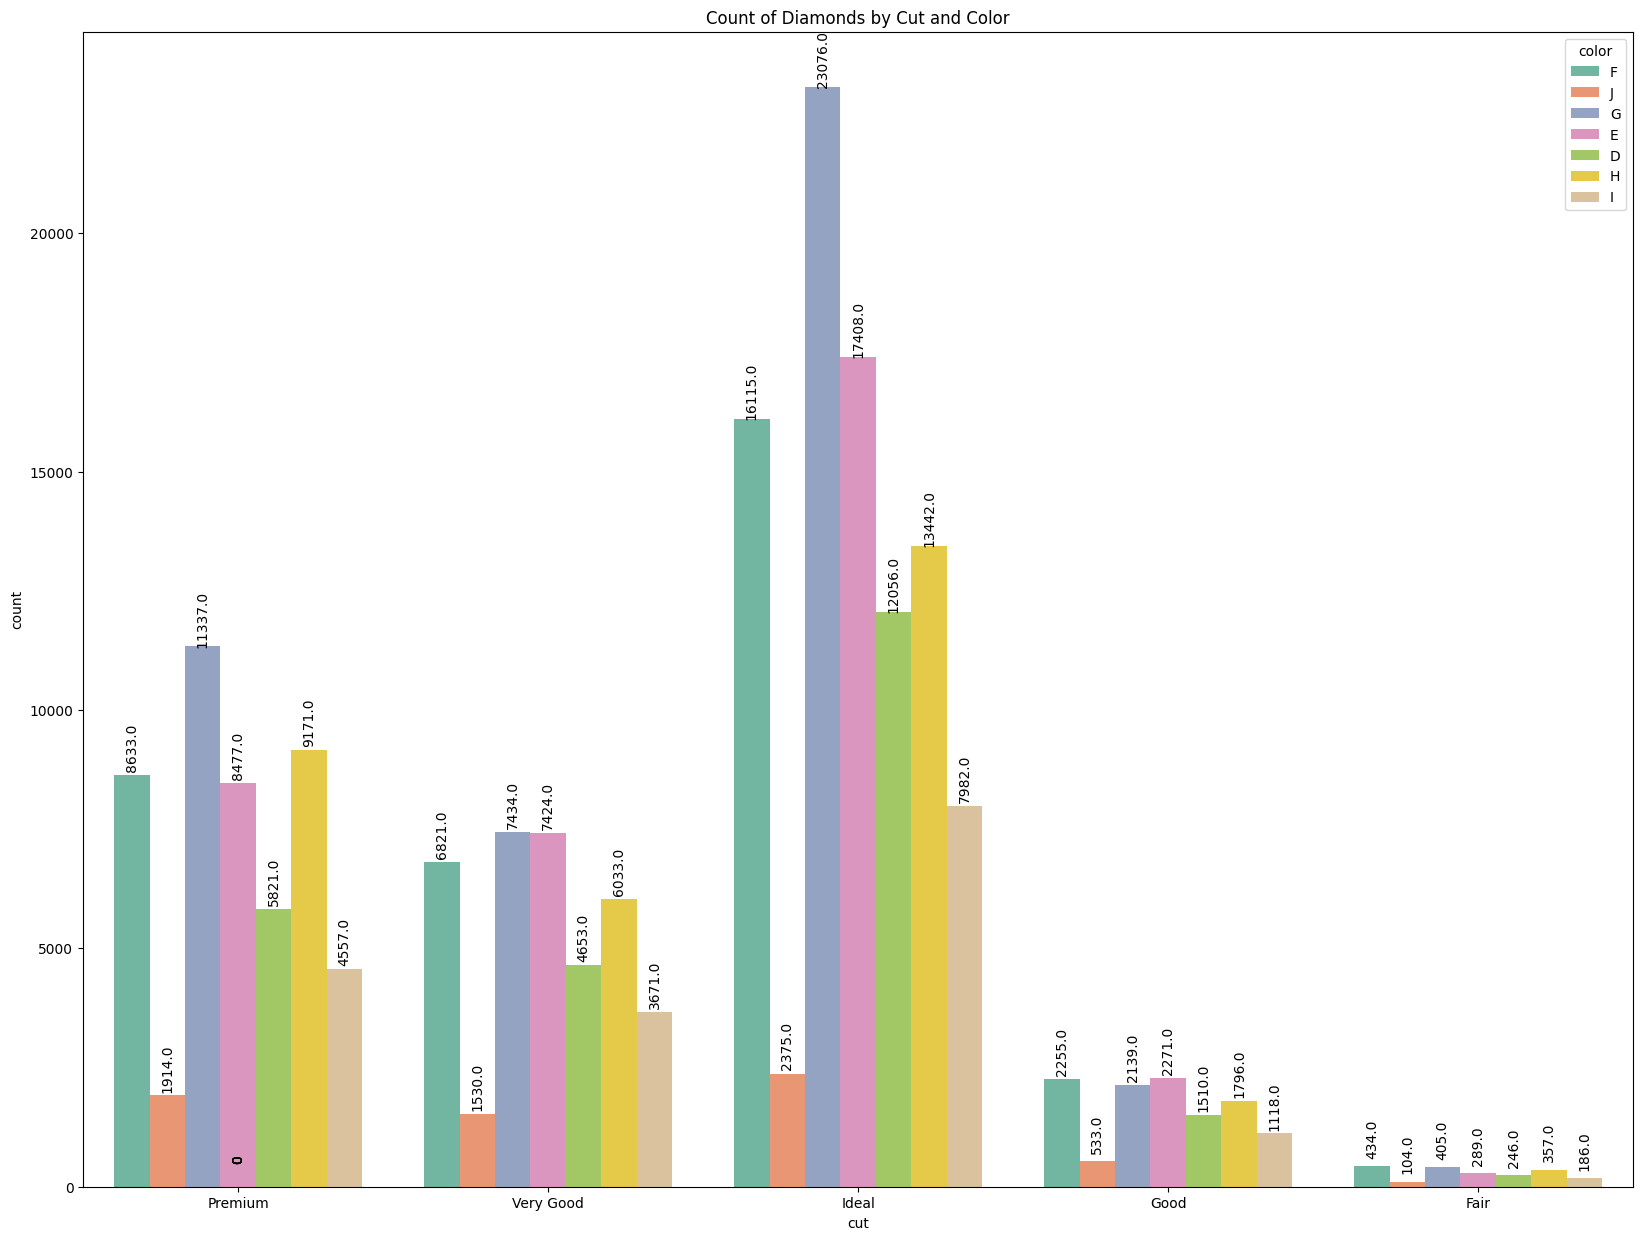

In [52]:
# Cut vs Color


plt.figure(figsize=(20,15))    # Sets the figure size

b1=sns.countplot(x='cut',hue='color',data=data[categorical_col])

for p in b1.patches:     
    b1.annotate(f'{p.get_height()}',(p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0,20), textcoords='offset points',rotation=90)
    
plt.title("Count of Diamonds by Cut and Color")

Text(0.5, 1.0, 'Count of Diamonds by Clarity and Color')

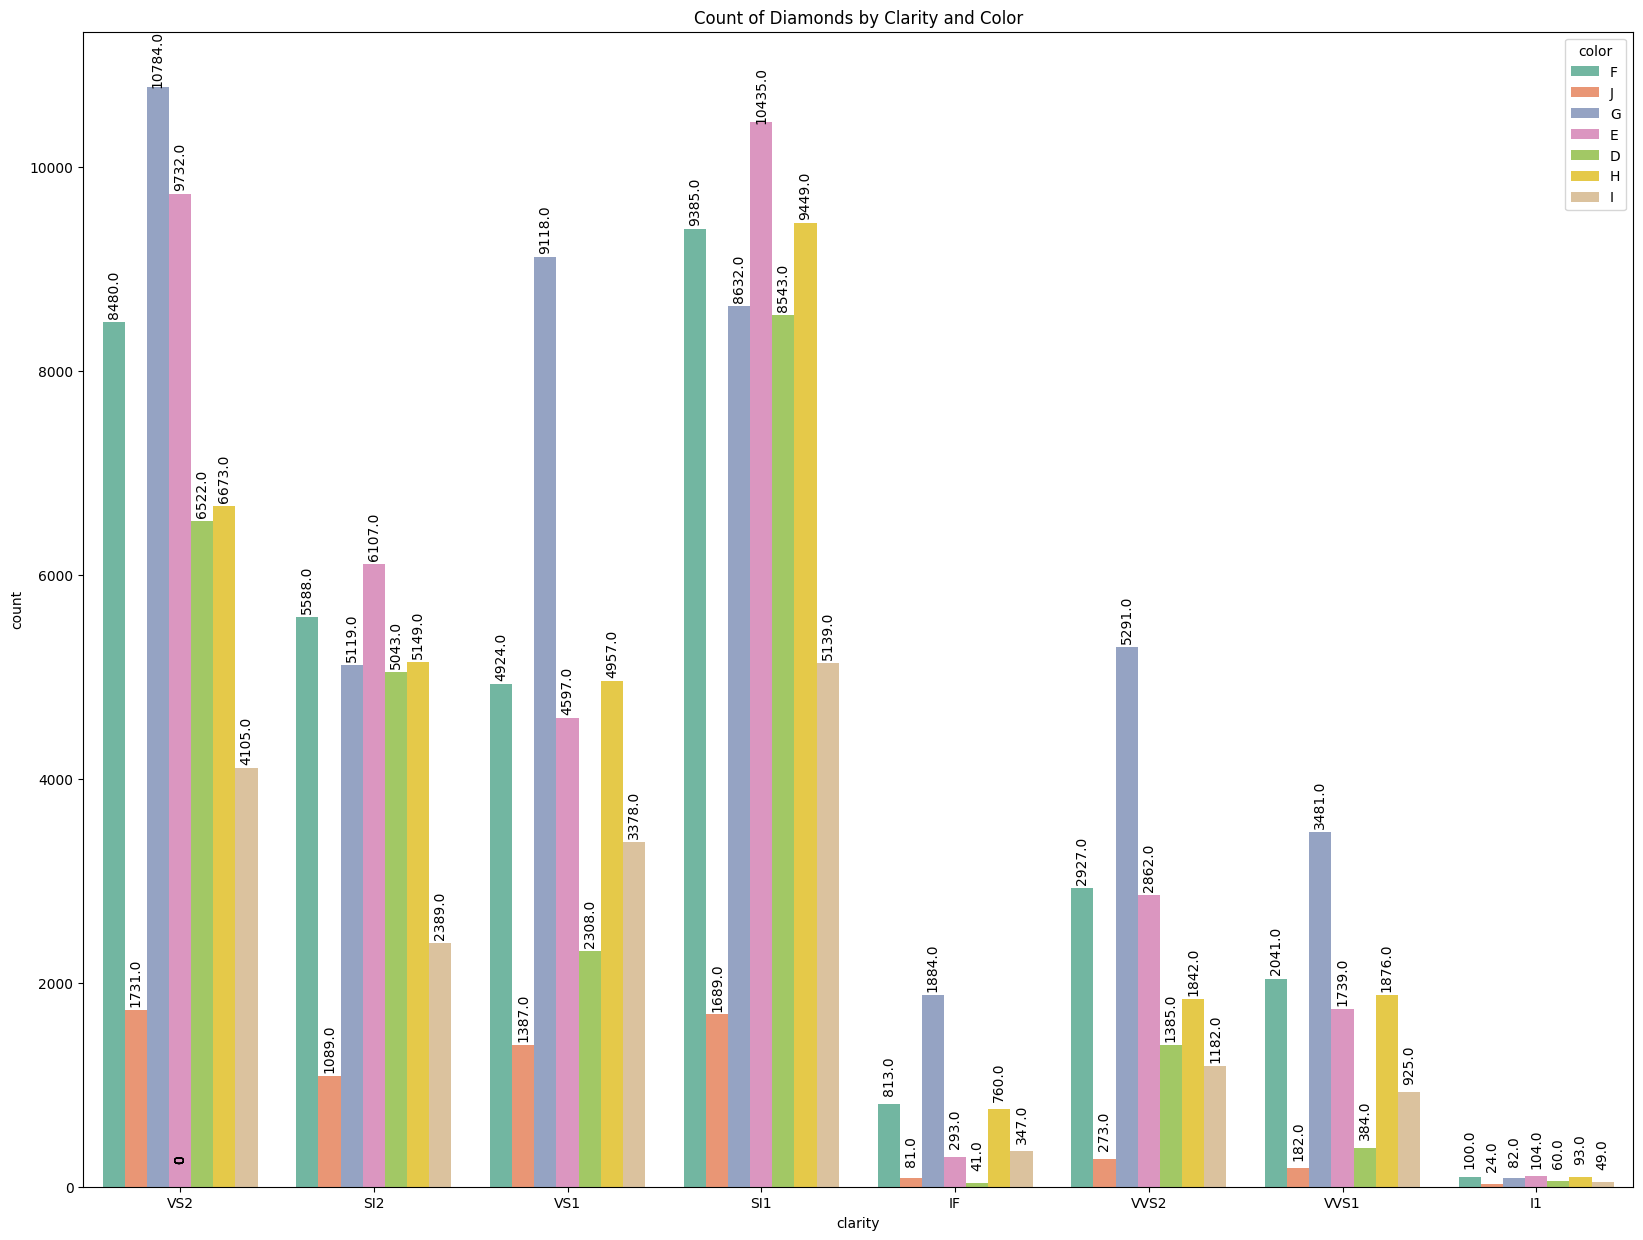

In [53]:
# Clarity Vs Color


plt.figure(figsize=(20,15))    # Sets the figure size

b1=sns.countplot(x='clarity',hue='color',data=data[categorical_col])


for p in b1.patches:     
    b1.annotate(f'{p.get_height()}',(p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0,20), textcoords='offset points',rotation=90)
    


plt.title("Count of Diamonds by Clarity and Color")

Text(0.5, 1.0, 'Count of Diamonds by Cut and Clarity')

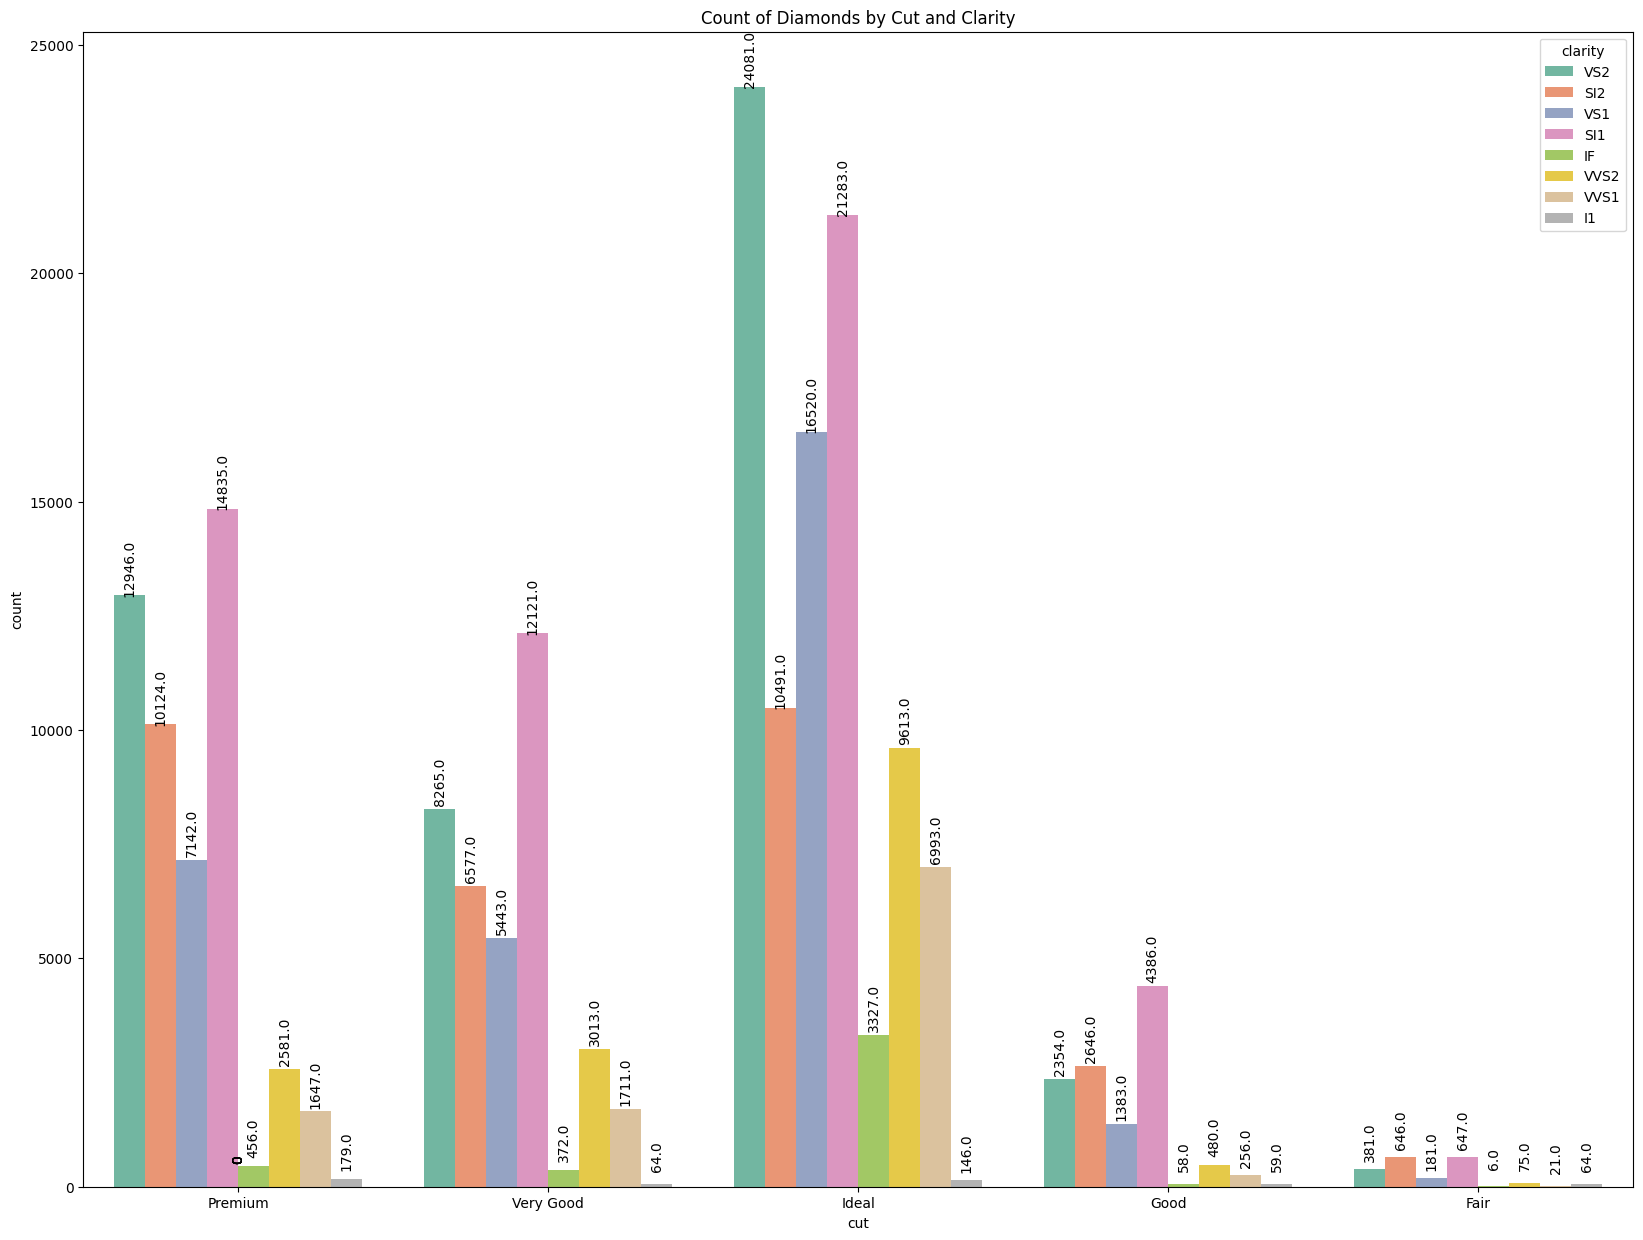

In [54]:
# Cut Vs clarity

plt.figure(figsize=(20,15))    # Sets the figure size

b1=sns.countplot(x='cut',hue='clarity',data=data[categorical_col])

for p in b1.patches:     
    b1.annotate(f'{p.get_height()}',(p.get_x() + p.get_width()/2., p.get_height()),
               ha='center', va='center', xytext=(0,20), textcoords='offset points',rotation=90)
    

plt.title("Count of Diamonds by Cut and Clarity")

In [55]:
# I want to show countplot , barplot and historgram works same here for catogeroies vs frequency(count)

-------------------------------------------------------------------------------------

Stack Column Chart 

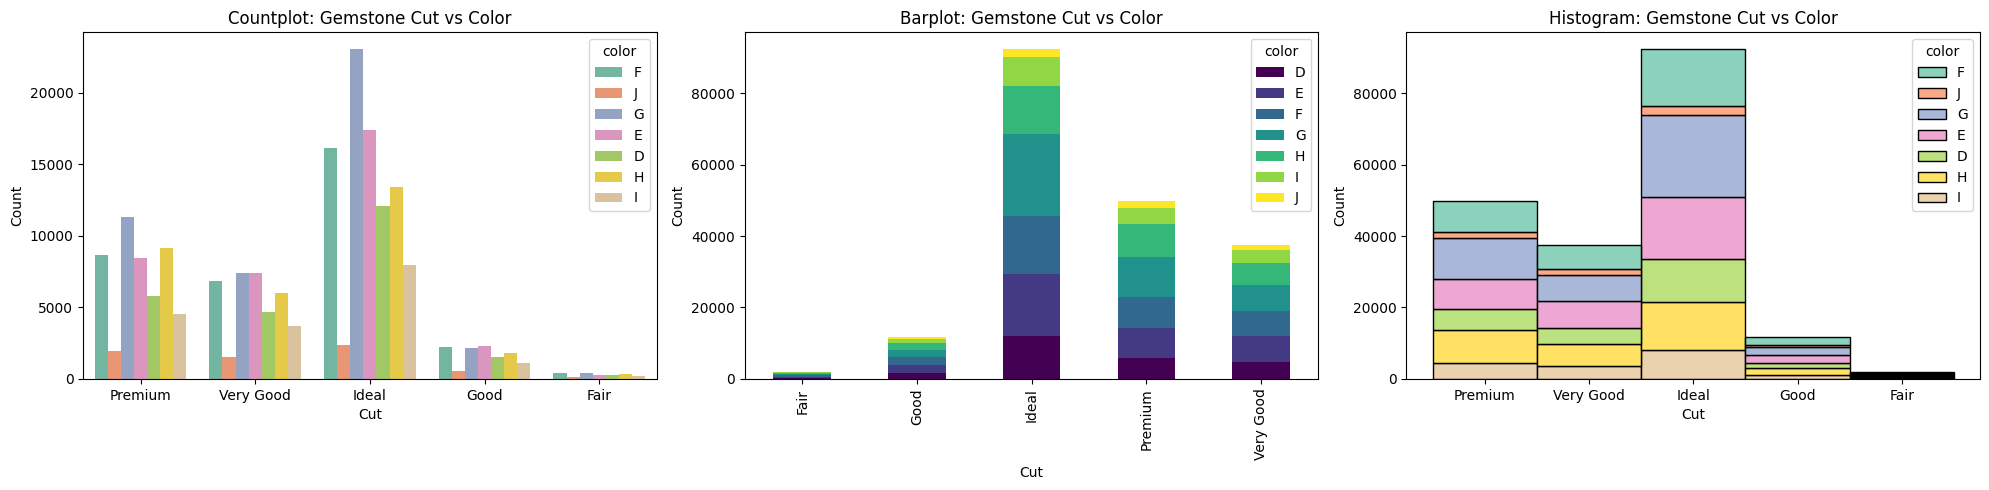

In [56]:

# Create a figure and three subplots
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(20,5))

# First subplot: Countplot
sns.countplot(x='cut', hue='color', data=data[categorical_col], ax=axes[0])
axes[0].set_title("Countplot: Gemstone Cut vs Color")
axes[0].set_xlabel("Cut")
axes[0].set_ylabel("Count")

# Second subplot: Barplot
ct = pd.crosstab(data[categorical_col]["cut"], data[categorical_col]["color"])
ct.plot(kind="bar", stacked=True, ax=axes[1], colormap="viridis")  # Use pandas plot for stacked barplot
axes[1].set_title("Barplot: Gemstone Cut vs Color")
axes[1].set_xlabel("Cut")
axes[1].set_ylabel("Count")



# Third subplot: Histogram
sns.histplot(data, x='cut', hue='color', multiple="stack", ax=axes[2], palette="Set2")
axes[2].set_title("Histogram: Gemstone Cut vs Color")
axes[2].set_xlabel("Cut")
axes[2].set_ylabel("Count")

# Adjust layout to prevent overlapping
plt.tight_layout()
plt.show()



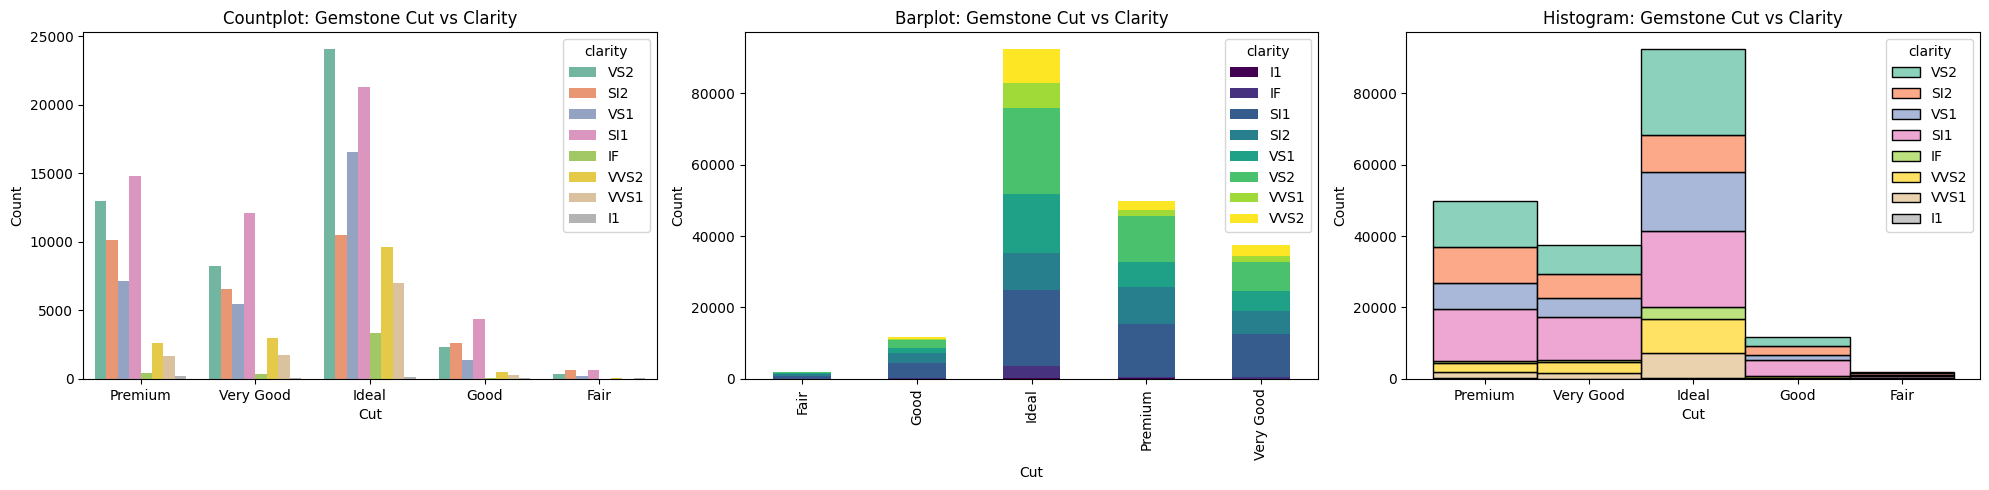

In [57]:
# Create a figure and three subplots
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(20, 5))

# First subplot: Countplot
sns.countplot(x='cut', hue='clarity', data=data[categorical_col], ax=axes[0])
axes[0].set_title("Countplot: Gemstone Cut vs Clarity")
axes[0].set_xlabel("Cut")
axes[0].set_ylabel("Count")

# Second subplot: Barplot
ct = pd.crosstab(data[categorical_col]["cut"], data[categorical_col]["clarity"])
ct.plot(kind="bar", stacked=True, ax=axes[1], colormap="viridis")  # Use pandas plot for stacked barplot
axes[1].set_title("Barplot: Gemstone Cut vs Clarity")
axes[1].set_xlabel("Cut")
axes[1].set_ylabel("Count")



# Third subplot: Histogram
sns.histplot(data, x='cut', hue='clarity', multiple="stack", ax=axes[2], palette="Set2")
axes[2].set_title("Histogram: Gemstone Cut vs Clarity")
axes[2].set_xlabel("Cut")
axes[2].set_ylabel("Count")

# Adjust layout to prevent overlapping
plt.tight_layout()
plt.show()



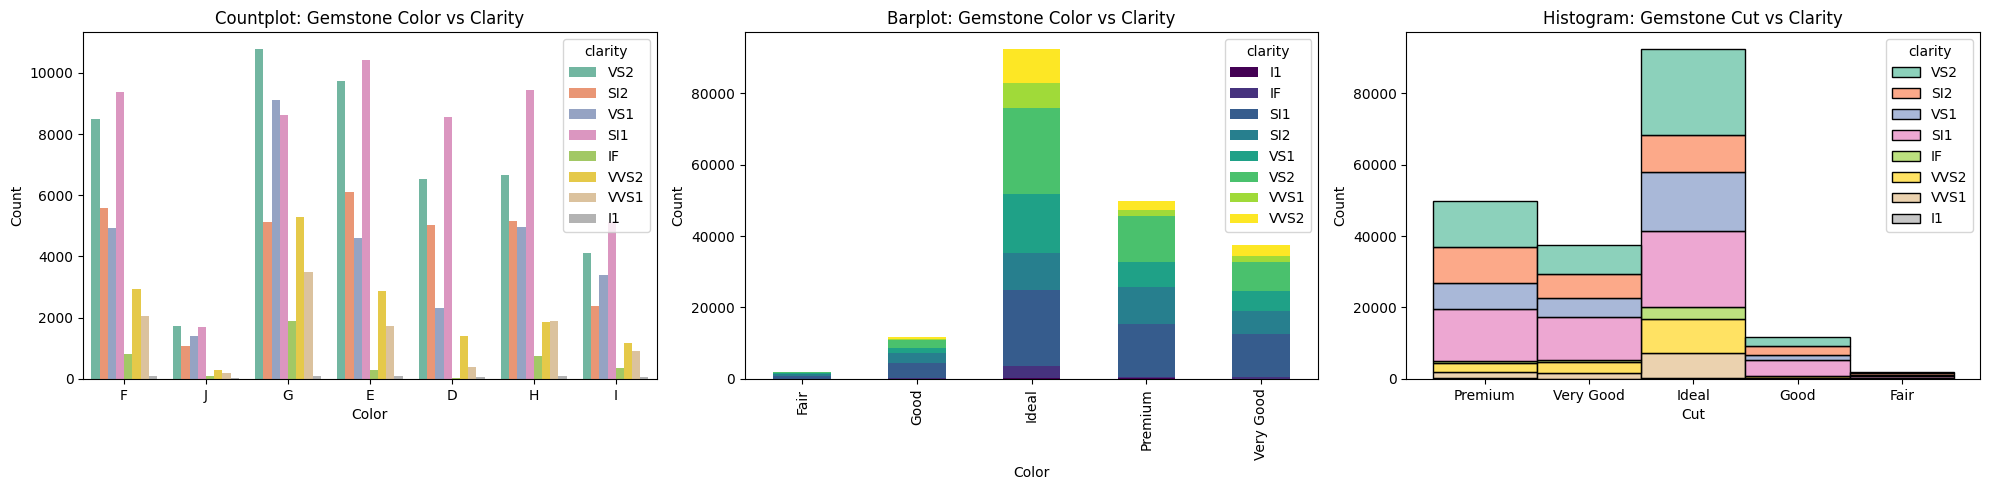

In [58]:
# Create a figure and three subplots
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(20, 5))

# First subplot: Countplot
sns.countplot(x='color', hue='clarity', data=data[categorical_col], ax=axes[0])
axes[0].set_title("Countplot: Gemstone Color vs Clarity")
axes[0].set_xlabel("Color")
axes[0].set_ylabel("Count")

# Second subplot: Barplot
ct = pd.crosstab(data[categorical_col]["cut"], data[categorical_col]["clarity"])
ct.plot(kind="bar", stacked=True, ax=axes[1], colormap="viridis")  # Use pandas plot for stacked barplot
axes[1].set_title("Barplot: Gemstone Color vs Clarity")
axes[1].set_xlabel("Color")
axes[1].set_ylabel("Count")



# Third subplot: Histogram
sns.histplot(data, x='cut', hue='clarity', multiple="stack", ax=axes[2], palette="Set2")
axes[2].set_title("Histogram: Gemstone Cut vs Clarity")
axes[2].set_xlabel("Cut")
axes[2].set_ylabel("Count")

# Adjust layout to prevent overlapping
plt.tight_layout()
plt.show()

In [59]:
# Crosstab cibarivate;;;;;;

<Figure size 1000x600 with 0 Axes>

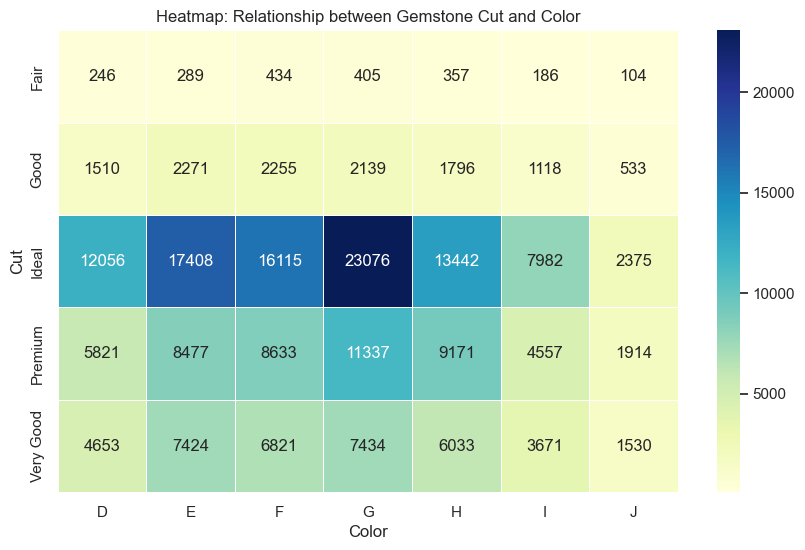

In [60]:

# Bar plot using Seaborn
ct = pd.crosstab(data[categorical_col]["cut"], data[categorical_col]["color"])
sns.set(style="whitegrid")  # Set style to whitegrid for a cleaner look
plt.figure(figsize=(10, 6))  # Adjust figure size as needed


# Heatmap using Seaborn
plt.figure(figsize=(10, 6))  # Adjust figure size as needed

sns.heatmap(ct, cmap="YlGnBu", annot=True, fmt="d", linewidths=.5)
plt.title("Heatmap: Relationship between Gemstone Cut and Color")
plt.xlabel("Color")
plt.ylabel("Cut")
plt.show()


-----------------------------------------------------------------------------------------------

# 3.Multivariate Analysis

Since `cut`, `color`, and `clarity` are categorical variables and not continuous, it's inappropriate to use correlation analysis. Instead, for categorical features, we can employ the chi-squared test to identify associations. This statistical test assesses whether there is a significant relationship between categorical variables, making it a suitable method for exploring associations in non-numeric data..

In [61]:
# Use the `chi2_contingency` function from `scipy.stats` to perform the chi-squared test:

from scipy.stats import chi2_contingency

# Assuming diamond_df is your DataFrame
contingency_table = pd.crosstab(data[categorical_col]['clarity'],[data[categorical_col]['cut'],data[categorical_col]['color']])


# Note: pd.crosstab(data[categorical_col]['clarity'],[data[categorical_col]['cut'],data[categorical_col]['color']]) If we change combinations graphs looks different but the values will be exact same.
# So we can opt any of the combination we want.(Already tried!!!)


In [62]:
contingency_table   #Here no issue is there but if we do like : pd.crosstab(data[categorical_col]['clarity'],[data[categorical_col]['color'],data[categorical_col]['cut']])
                    #most of the values would be hidden then we have to use the below appraoch to make the table visible for all entires.

cut     Fair                             Good            ... Premium        \
color      D    E    F    G    H   I   J    D    E    F  ...       H     I   
clarity                                                  ...                 
I1         2   11   14   13   11   5   8    8   11    8  ...      38    20   
IF         3    0    1    2    0   0   0    3    6    7  ...      91    34   
SI1       83  104  152  102  125  56  25  678  923  913  ...    2894  1393   
SI2      108  110  138  117  105  42  26  486  602  537  ...    1810   772   
VS1       13   11   32   55   39  21  10   92  185  203  ...    1384   827   
VS2       30   42   75   87   65  52  30  197  414  473  ...    2269  1094   
VVS1       1    3    5    5    2   3   2   10   52   39  ...     336   172   
VVS2       6    8   17   24   10   7   3   36   78   75  ...     349   245   

cut          Very Good                                     
color      J         D     E     F     G     H     I    J  
clarity                                                    
I1         5         7    16     8    13     9     7    4  
IF        20         6    47    99   120    61    23   16  
SI1      464      1828  2397  2252  1883  2165  1185  411  
SI2      381      1162  1428  1204   997  1031   505  250  
VS1      379       392   843   883  1404   916   680  325  
VS2      553       929  1553  1437  1821  1207   907  411  
VVS1      40        70   425   329   399   300   147   41  
VVS2      72       259   715   609   797   344   217   72  

[8 rows x 35 columns]

We noticed that some information in the table is hidden, making it challenging for thorough analysis. To address this, we've adjusted the settings to display more rows and columns, ensuring a comprehensive view of the data.

In [63]:
# Set maximum number of displayed rows and columns
pd.set_option('display.max_rows',10)  # Adjust the number as needed
pd.set_option('display.max_columns', 22000)  # Adjust the number as needed
print("These numerical values are count or frequency...")

contingency_table

These numerical values are count or frequency...


cut     Fair                             Good                                \
color      D    E    F    G    H   I   J    D    E    F    G    H    I    J   
clarity                                                                       
I1         2   11   14   13   11   5   8    8   11    8   11    8    8    5   
IF         3    0    1    2    0   0   0    3    6    7   24   11    6    1   
SI1       83  104  152  102  125  56  25  678  923  913  627  701  379  165   
SI2      108  110  138  117  105  42  26  486  602  537  395  364  167   95   
VS1       13   11   32   55   39  21  10   92  185  203  360  235  203  105   
VS2       30   42   75   87   65  52  30  197  414  473  490  377  268  135   
VVS1       1    3    5    5    2   3   2   10   52   39   67   39   39   10   
VVS2       6    8   17   24   10   7   3   36   78   75  165   61   48   17   

cut     Ideal                                    Premium                    \
color       D     E     F     G     H     I    J       D     E     F     G   
clarity                                                                      
I1         32    27    29    20    27     9    2      11    39    41    25   
IF         24   206   636  1536   597   284   44       5    34    70   202   
SI1      3713  4309  3351  3596  3564  2126  624    2241  2702  2717  2424   
SI2      1678  2065  1783  1886  1839   903  337    1609  1902  1926  1724   
VS1      1407  2595  2813  5107  2383  1647  568     404   963   993  2192   
VS2      4084  5490  4235  5131  2755  1784  602    1282  2233  2260  3255   
VVS1      248  1046  1459  2388  1199   564   89      55   213   209   622   
VVS2      870  1670  1809  3412  1078   665  109     214   391   417   893   

cut                      Very Good                                     
color       H     I    J         D     E     F     G     H     I    J  
clarity                                                                
I1         38    20    5         7    16     8    13     9     7    4  
IF         91    34   20         6    47    99   120    61    23   16  
SI1      2894  1393  464      1828  2397  2252  1883  2165  1185  411  
SI2      1810   772  381      1162  1428  1204   997  1031   505  250  
VS1      1384   827  379       392   843   883  1404   916   680  325  
VS2      2269  1094  553       929  1553  1437  1821  1207   907  411  
VVS1      336   172   40        70   425   329   399   300   147   41  
VVS2      349   245   72       259   715   609   797   344   217   72

<Axes: xlabel='cut-color', ylabel='clarity'>

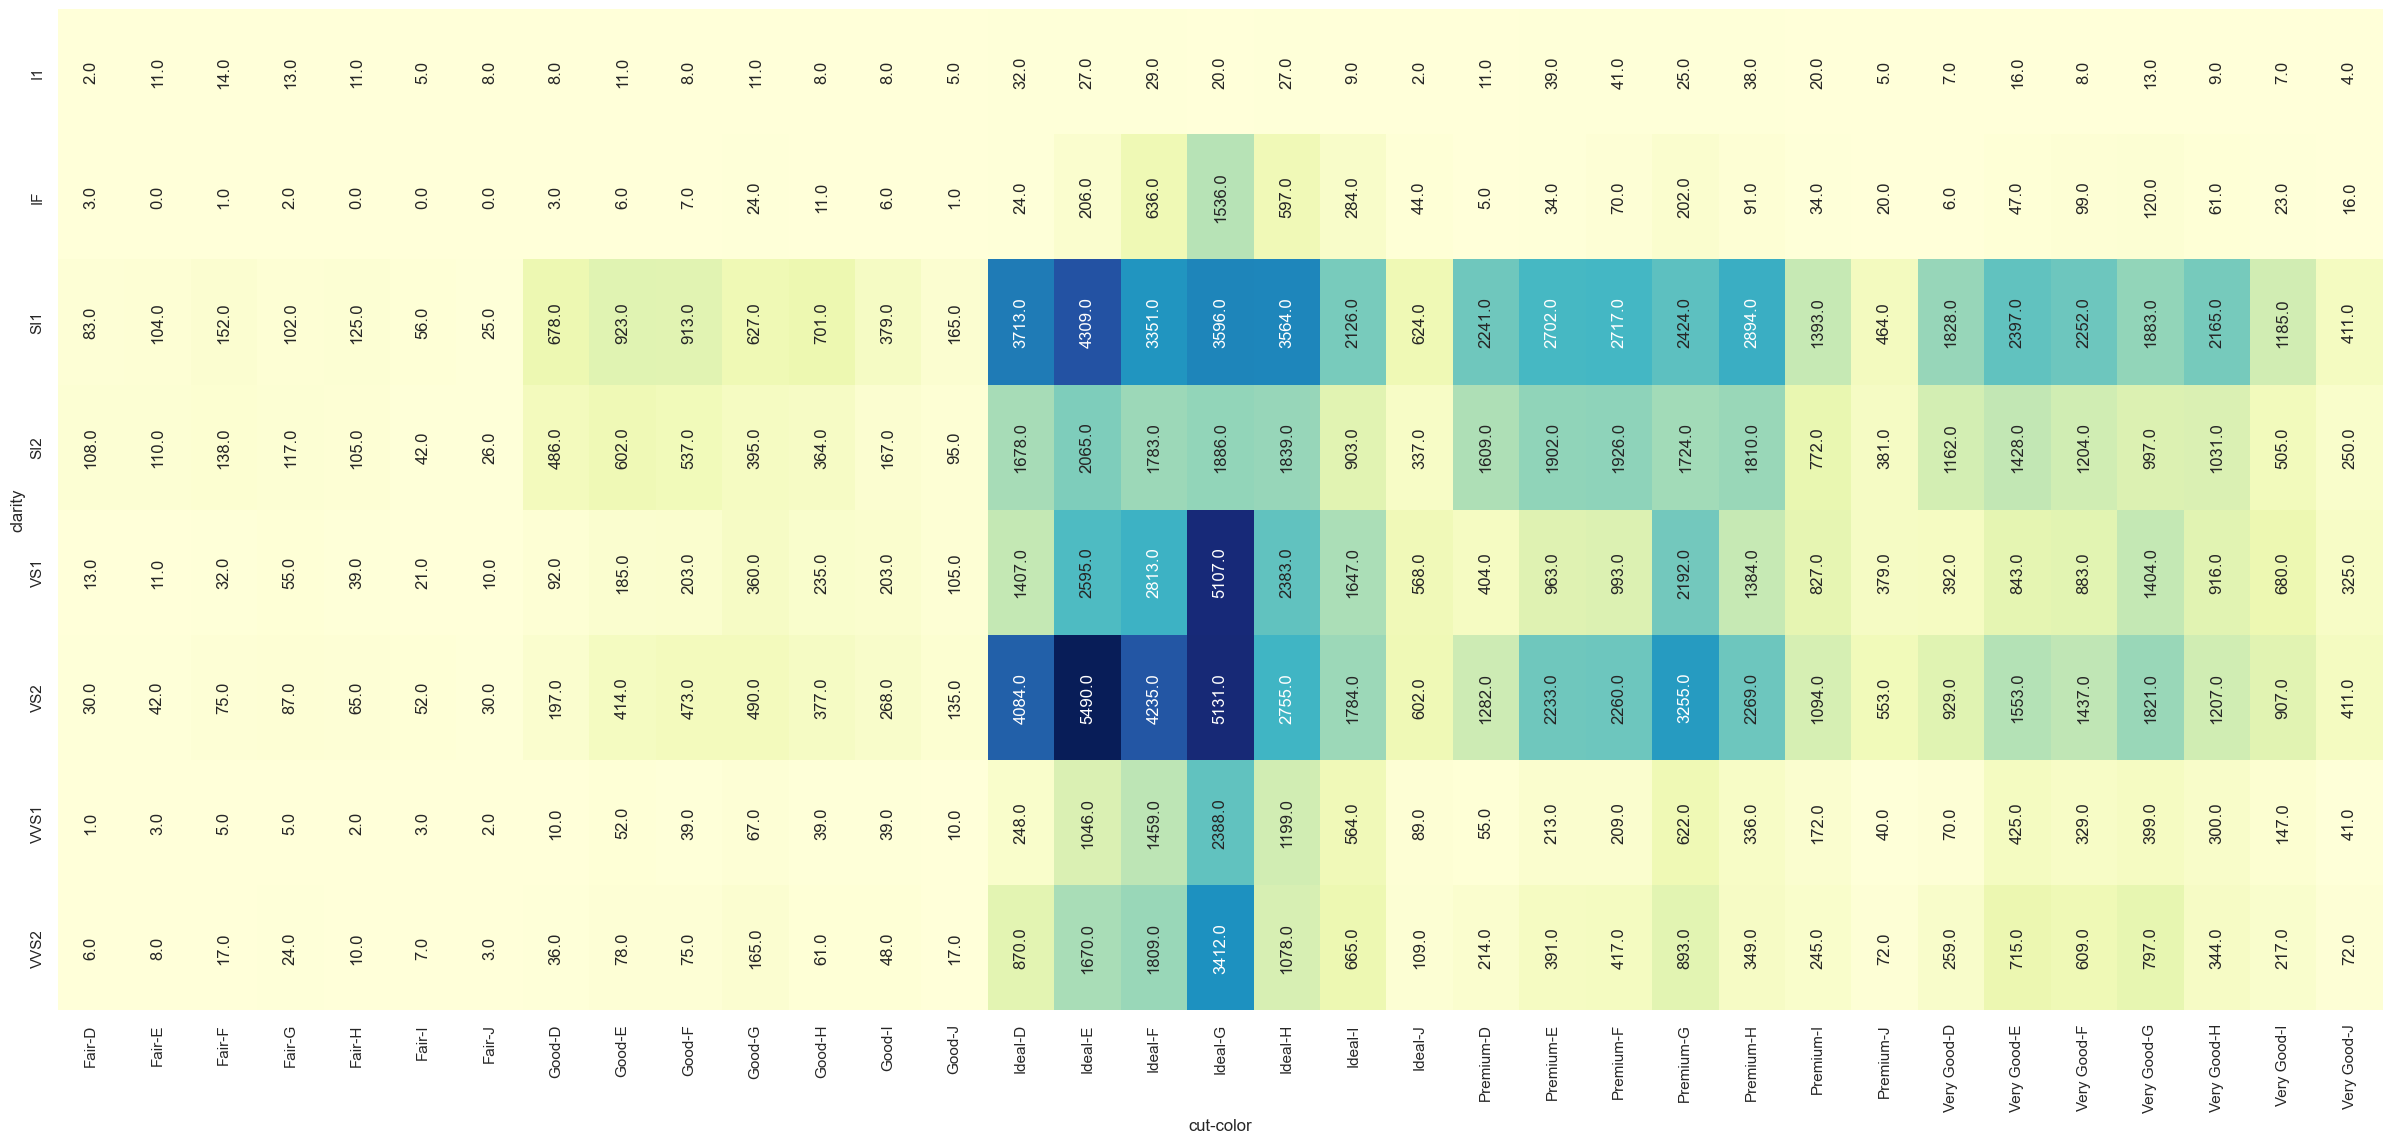

In [64]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(30,13))
sns.heatmap(contingency_table,cmap="YlGnBu", annot=True, cbar=False,fmt='.1f', annot_kws={'rotation': 90})

In [65]:
print("Maximum Frequency of table :",contingency_table.values.max())    # Darkest shade
print("Minimum Frequency of table :",contingency_table.values.min())    #Lightest shade

Maximum Frequency of table : 5490
Minimum Frequency of table : 0


Conclusion:

* This shows that diamond having the Clarity of 'VS2' , having 'Ideal' cut and color 'E ' , has the maximum frequency in the dataset.
* This shows  that diamond having Clarity of 'IF', 'Fair' cut and color as E,H,I,J  , has the minimum frequency in the dataset 
ie. zero here, means No data is there having these features inside the dataset.

---------------------------------------------------------------------------------------------------------------------------------------------------------------------

Chi-square (χ²) test is a statistical test used to determine if there is a significant association between two categorical variables. 


### Step 1: Set Up the Hypotheses

- **Null Hypothesis (H0):** The categorical features (`cut`, `clarity`, `color`) are independent; there is no association between them.
  
- **Alternative Hypothesis (H1):** The categorical features are not independent; there is a significant association between them.

### Step 2: Perform the Chi-Squared Test

### Step 3: Interpret the Results

- **Chi-squared value:** This tells us the strength of the association. Higher values indicate a stronger association.
  
- **P-value:** If the p-value is below our chosen significance level (commonly 0.05), we reject the null hypothesis. A low p-value suggests a significant association.

### Step 4: Draw Conclusions

- **Reject H0:** If the p-value is low, we can reject the null hypothesis and conclude that there is a significant association between at least some of the categorical features (`cut`, `clarity`, `color`).
- **Do Not Reject H0:** If the p-value is high, there isn't enough evidence to reject the null hypothesis, suggesting independence between the categorical features.

In [66]:
#Step1:
Null_Hypothesis="The categorical features (`cut`, `clarity`, `color`) are independent and there is no association between them."
Alternative_Hypothesis="The categorical features (`cut`, `clarity`, `color`) are not independent; there is association between them."

# Step2:
# Perform chi-square test
chi2_stat, p_val, _, _ = chi2_contingency(contingency_table)

# Output results
print(f"Chi-square statistic: {chi2_stat}")
print(f"P-value: {p_val}")

#Step3:
# Interpret results
alpha = 0.05  # significance level
print(f"Significance level: {alpha}")
print(f"Is the p-value less than alpha? {'Yes' if p_val < alpha else 'No'}")

#Step4:
# Conclusion
if p_val < alpha:
    print("REJECT the null hypothesis which stated that:",Null_Hypothesis)
    print("-----------------------------------------------------------------------------------------------------------------------------------------------------------")
    
    print("CONCLUSION: The categorical features (`cut`, `clarity`, `color`) are dependent; there is association between them.")
else:
    print("FAIL TO REJECT the null hypothesis which stated that:",Alternative_Hypothesis)
    print("-----------------------------------------------------------------------------------------------------------------------------------------------------------")    
    print("CONCLUSION: The categorical features (`cut`, `clarity`, `color`) are independent; there is no association between them.")

Chi-square statistic: 21603.48848917976
P-value: 0.0
Significance level: 0.05
Is the p-value less than alpha? Yes
REJECT the null hypothesis which stated that: The categorical features (`cut`, `clarity`, `color`) are independent and there is no association between them.
-----------------------------------------------------------------------------------------------------------------------------------------------------------
CONCLUSION: The categorical features (`cut`, `clarity`, `color`) are dependent; there is association between them.


In [67]:

# Define the pairs of categorical variables
variable_pairs = [('cut', 'clarity'), ('cut', 'color'), ('clarity', 'color')]

# Loop through each pair
for variable1, variable2 in variable_pairs:
    # Create a contingency table
    contingency_table = pd.crosstab(data[categorical_col][variable1], data[categorical_col][variable2])

    # Perform the chi-square test
    chi2, p, _, _ = chi2_contingency(contingency_table)

    # Output the results
    print(f"Chi-square test for {variable1} and {variable2}:")
    print(f"Chi2 Statistic: {chi2}")
    print(f"  P-value: {p}")
    
    # Check for significance
    alpha = 0.05
    if p < alpha:
        print("  Result: There is a significant association.")
    else:
        print("  Result: There is no significant association.")
    
    print("\n")



Chi-square test for cut and clarity:
Chi2 Statistic: 10261.708845528377
  P-value: 0.0
  Result: There is a significant association.


Chi-square test for cut and color:
Chi2 Statistic: 1350.8542073483675
  P-value: 1.5742145032455938e-270
  Result: There is a significant association.


Chi-square test for clarity and color:
Chi2 Statistic: 9025.317699192687
  P-value: 0.0
  Result: There is a significant association.




In [68]:

variable_pairs = [('cut', 'clarity'), ('cut', 'color'), ('clarity', 'color')]

# Loop through each pair
for variable1, variable2 in variable_pairs:
    # Create a contingency table
    contingency_table = pd.crosstab(data[categorical_col][variable1], data[categorical_col][variable2])

    # Perform the chi-square test
    chi2, p, _, _ = chi2_contingency(contingency_table)

    # Output the results with p-value rounded to 2 decimal points
    print(f"Chi-square test for {variable1} and {variable2}:")
    print(f"  Chi2 Statistic: {chi2}")
    print(f"  P-value: {p:.2f}")  # Round p-value to 2 decimal points
    
    # Check for significance
    alpha = 0.05
    if p < alpha:
        print("  Result: There is a significant association.")
    else:
        print("  Result: There is no significant association.")
    
    print("\n")


Chi-square test for cut and clarity:
  Chi2 Statistic: 10261.708845528377
  P-value: 0.00
  Result: There is a significant association.


Chi-square test for cut and color:
  Chi2 Statistic: 1350.8542073483675
  P-value: 0.00
  Result: There is a significant association.


Chi-square test for clarity and color:
  Chi2 Statistic: 9025.317699192687
  P-value: 0.00
  Result: There is a significant association.




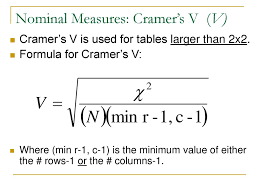

In [69]:
# To Get the Idea that which pair has the high asscociation for that we have to use Cramér's V 


# Define the pairs of categorical variables
variable_pairs = [('cut', 'clarity'), ('cut', 'color'), ('clarity', 'color')]

# Loop through each pair
for variable1, variable2 in variable_pairs:
    # Create a contingency table
    contingency_table = pd.crosstab(data[variable1], data[variable2])

    # Perform the chi-square test
    chi2, _, _, _ = chi2_contingency(contingency_table)

    # Calculate Cramér's V  
    # Range of Cramér's V   is from 0 (no relationship) to 1 (perfect relationship)
    num_rows = contingency_table.shape[0]
    num_cols = contingency_table.shape[1]
    cramers_v = np.sqrt(chi2 / (data.shape[0] * min(num_rows - 1, num_cols - 1)))

    # Output the results
    print(f"Cramér's V for {variable1} and {variable2}: {cramers_v:.2f}")

    # Interpret the strength of association
    if cramers_v < 0.1:
        print("  Strength of association: Weak")
    elif 0.1 <= cramers_v < 0.3:
        print("  Strength of association: Moderate")
    elif 0.3 <= cramers_v < 0.5:
        print("  Strength of association: Strong")
    else:
        print("  Strength of association: Very Strong")

    print("\n")


Cramér's V for cut and clarity: 0.12
  Strength of association: Moderate




Cramér's V for cut and color: 0.04
  Strength of association: Weak


Cramér's V for clarity and color: 0.09
  Strength of association: Weak


